# Codigo base

In [1]:
source("utils.r")

# Cargar datos

In [2]:
# Example of how to call the function
url <- "https://github.com/mbarrena/tesis/blob/main/data/Data%20trimestral%201950%20a%202023%20con%201%20DUMMY%20CORTA%20outliers%20(2q%203q%201989%201q1990)%20.xlsx?raw=true"
temp_file <- tempfile(fileext = ".xlsx")
GET(url, write_disk(temp_file, overwrite = TRUE))

# Read the `data` from the Excel file
df_trimestral_crudo <- read_excel(temp_file)

Response [https://raw.githubusercontent.com/mbarrena/tesis/refs/heads/main/data/Data%20trimestral%201950%20a%202023%20con%201%20DUMMY%20CORTA%20outliers%20(2q%203q%201989%201q1990)%20.xlsx]
  Date: 2025-04-05 05:05
  Status: 200
  Content-Type: application/octet-stream
  Size: 56.7 kB
<ON DISK>  /tmp/RtmpFC66ja/file15b1f593ffe87.xlsxNULL

In [3]:
# Select specific columns and rows from df_trimestral_crudo
df_Arg <- df_trimestral_crudo |> 
  dplyr::slice(37:dplyr::n()) |>  # Equivalent to iloc[36:] (1-based index in R)
  dplyr::select(año, trimestre, ipc_ajust, E, Ebc, pbird, impp_usa, Psoja_USA, Pmaíz_USA, Ptrigo_USA, TOTfmi, D1) |>  # nolint
  as.data.frame()  # Convert to data frame (if needed)

# Rename "ipc_ajust" to "ipc"
df_Arg <- renameColumnOfDataframe(df_Arg, "ipc_ajust", "ipc")

# Display first 6 rows
print(head(df_Arg))

# Display first 65 rows
print(head(df_Arg, 65))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
    año trimestre          ipc            E          Ebc  pbird impp_usa
1  1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2  1959      2ºTr 3.074744e-11 8.556667e-12 8.317

In [4]:
# Copy df_Arg to df_ERPT_Arg1
df_ERPT_Arg1 <- df_Arg

# Display first rows
print(head(df_ERPT_Arg1))

# Apply logarithm to specific columns
df_ERPT_Arg1 <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg1) # nolint: line_length_linter.

# Display transformed dataframe
print(head(df_ERPT_Arg1))
print(tail(df_ERPT_Arg1))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.5127

In [5]:
# Create df_ERPT_Arg as a copy of df_Arg
df_ERPT_Arg <- df_Arg

# Display first rows
print(head(df_ERPT_Arg))

# Apply logarithm transformation
df_ERPT_Arg <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display transformed dataframe
print(head(df_ERPT_Arg))

# Apply differencing transformation
df_ERPT_Arg <- makeDiffColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display first and last rows
print(head(df_ERPT_Arg))
print(tail(df_ERPT_Arg, 90))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.5127

# Regresiones

### Como usar nuevos parámetros de umbrales
Están disponibles los siguientes parámetros:
- `threshold_var`: especificar 'ipc' (o la variable a usar) si se quiere usar umbrales. Si no se especifica, se ejecuta LP sin umbral.
- `upper_threshold`: indica el número de percentil a usar para el umbral por superior. Por defecto es 0.80 (los trimestres con inflación menor al 80-percentil quedan en un primer grupo debajo del umbral, mayores quedan en un segundo grupo arriba del umbral)
- `lower_threshold`: indica el número de percentil a usar para el umbral por inferior. Por defecto es NULL (nulo). Se podría usar 0.20 por ejemplo.
- `discard_threshold`: valores posibles `upper`, `lower` o no especificarlo. Si es especificado, no se tienen en cuenta los trimestres cuyo IPC esté por encima/por debajo de un umbral. Si se especifíca `upper`, se usa el umbral superior como punto de corte (`upper_threshold`). Si se especifica `lower`, se usa el umbral inferior como punto de corte.

:warning: Si no se especifica `discard_threshold`, hay que especificar **solo uno entre uppder_threshold o lower_threshold**. Si sí se especifica `discard_threshold`, hay que especificar tanto `upper_threshold` como `lower_threshold` (el indicado por `discar_threshold` se usa para descartar filas, el otro como umbral de LP). 

Te dejo para que despliegues con la flechita a la izquierda de los titulos, ejemplos de LP con un umbral (lo normal que hace Jorda), de LP excluyendo datos debajo del umbral inferior (y tomando como umbral de LP el umbral superior) y de LP excluyendo datos del umbral superior (y tomando como umbral de LP el umbral inferior)

Abajo de los lags y los impulso respuesta vas a ver graficados los IPCs en el tiempo y las lineas correspondientes a los umbrales elegidos. Cuando elegis cortar, se pone en rojo el umbral de corte y en verde el umbral de LP. Si no cortas, el umbral es único y se muestra en azul.

#### Ejemplo sin excluir datos del dataframe

ipc 0.8

Run configurations:

lags_endog_lin,lags_endog_nl,lags_criterion,max_lags,lags_exog,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
NA,NA,AIC,6,6,0,1,0.95,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,259,"E, ipc, pbird",3


Lags for Shock: E

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,5,1,1,5,5,6,6,1,1,1
ipc,5,2,6,1,5,1,6,1,1,1
pbird,1,1,1,1,1,1,1,1,1,1


Lags for Shock: ipc

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,5,1,1,5,5,6,6,1,1,1
ipc,5,2,6,1,5,1,6,1,1,1
pbird,1,1,1,1,1,1,1,1,1,1


Lags for Shock: pbird

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,5,1,1,5,5,6,6,1,1,1
ipc,5,2,6,1,5,1,6,1,1,1
pbird,1,1,1,1,1,1,1,1,1,1


Impulse: E -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.4805585,0.48055851,0.4805585,0.4805585,0.48055851,0.4805585
2,2,0.8675941,0.70852096,1.0266673,1.1837473,0.76674658,1.6007481
3,3,1.2151870,0.56221092,1.8681630,1.3249275,-0.09148000,2.7413350
4,4,1.5349573,0.48467646,2.5852382,1.8250421,0.04063843,3.6094457
5,5,1.8781894,0.34771279,3.4086661,2.0956762,-0.13949428,4.3308467
6,6,2.2244630,0.05686051,4.3920655,2.3721880,-0.61644159,5.3608177
7,7,2.4725204,-0.36229391,5.3073346,2.5526769,-0.76311290,5.8684668
8,8,2.5500003,-0.79461929,5.8946200,2.9079851,-1.00028380,6.8162539
9,9,2.9196246,-0.95760914,6.7968583,3.0747875,-1.02765967,7.1772347


Impulse: E -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1,-0.03935275,-0.03935275,-0.03935275,-0.03935275,-0.03935275,-0.03935275
13,2,-0.05531390,-0.12100220,0.01037439,-0.06108811,-0.10016224,-0.02201399
14,3,-0.10731611,-0.24065807,0.02602584,-0.04988774,-0.14014147,0.04036599
15,4,-0.11211617,-0.30303323,0.07880090,-0.07168214,-0.20036563,0.05700135
16,5,-0.10051999,-0.35281494,0.15177495,-0.07354963,-0.23652020,0.08942094
17,6,-0.09980303,-0.42280583,0.22319977,-0.06091315,-0.24943856,0.12761225
18,7,-0.11599252,-0.51106340,0.27907835,-0.05850364,-0.27311980,0.15611253
19,8,-0.11122848,-0.59809302,0.37563606,-0.05498294,-0.30310725,0.19314137
20,9,-0.09990537,-0.64353431,0.44372357,-0.04172107,-0.30314772,0.21970558


Impulse: ipc -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,1,0.00000000,0.0000000,0.0000000,0.000000000,0.0000000,0.0000000
24,2,-0.01770003,-0.6518294,0.6164294,-0.574051603,-0.8875575,-0.2605457
25,3,0.33281469,-0.9993277,1.6649570,-0.074572270,-1.0463344,0.8971899
26,4,0.96273101,-1.0978629,3.0233249,0.193238186,-1.3595434,1.7460198
27,5,1.14132853,-1.9608079,4.2434650,0.581728949,-1.7310574,2.8945153
28,6,1.43665061,-2.7601727,5.6334739,0.737128804,-2.4167620,3.8910196
29,7,1.31415763,-4.2429625,6.8712777,0.573269531,-3.1890632,4.3356022
30,8,1.12087407,-5.5711520,7.8129001,0.118072904,-3.9417265,4.1778723
31,9,2.14162813,-5.3488666,9.6321228,-0.009736027,-4.2256170,4.2061449


Impulse: ipc -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,1,-0.03877977,-0.03877977,-0.03877977,-0.038779768,-0.03877977,-0.03877977
35,2,-0.02580892,-0.08809851,0.03648067,-0.008701345,-0.03319675,0.01579406
36,3,-0.04311262,-0.17398464,0.08775939,-0.043133315,-0.11076403,0.02449740
37,4,-0.06481140,-0.26667886,0.13705606,-0.014256860,-0.10810810,0.07959438
38,5,-0.07510348,-0.35001333,0.19980637,0.014061975,-0.09981487,0.12793882
39,6,-0.11322850,-0.46525355,0.23879656,0.027875864,-0.10493237,0.16068409
40,7,-0.16015666,-0.59322577,0.27291244,0.008876842,-0.14714781,0.16490150
41,8,-0.11457231,-0.63795565,0.40881102,-0.001053009,-0.18727953,0.18517351
42,9,-0.13058123,-0.72740048,0.46623801,0.003176543,-0.18870347,0.19505656


Impulse: pbird -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,1,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.000000
46,2,-0.7911606,-1.895724,0.3134026,0.8624767,-1.771299,3.496252
47,3,-1.6588168,-4.059251,0.7416174,3.2667376,-1.239896,7.773371
48,4,-2.0980040,-5.460210,1.2642020,3.8731831,-4.492059,12.238426
49,5,-2.9387440,-7.063139,1.1856507,5.3886486,-7.162846,17.940143
50,6,-3.2410606,-7.932861,1.4507401,10.6039790,-6.683454,27.891412
51,7,-3.7743805,-9.420029,1.8712684,9.3536074,-11.695955,30.403170
52,8,-4.5340717,-10.937505,1.8693613,10.8580850,-14.865752,36.581922
53,9,-4.4011819,-11.714721,2.9123573,14.2974698,-14.806751,43.401690


Impulse: pbird -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,0.00000000,0.0000000,0.0000000,0.000000,0.000000,0.000000
57,2,-0.04577595,-0.3602618,0.2687099,1.187241,-0.815115,3.189597
58,3,-0.24585881,-1.0949050,0.6031874,3.254217,-0.961868,7.470302
59,4,-0.33792114,-1.6133058,0.9374635,4.979641,-2.198775,12.158057
60,5,-0.70334844,-2.4925770,1.0858801,6.325225,-4.510797,17.161247
61,6,-0.88272988,-3.2064073,1.4409475,9.728585,-4.055620,23.512790
62,7,-1.30766335,-4.2955344,1.6802077,10.882920,-6.276357,28.042197
63,8,-1.84586773,-5.3876187,1.6958833,10.773514,-9.411935,30.958962
64,9,-1.92412115,-6.1508519,2.3026096,14.223383,-9.395700,37.842466


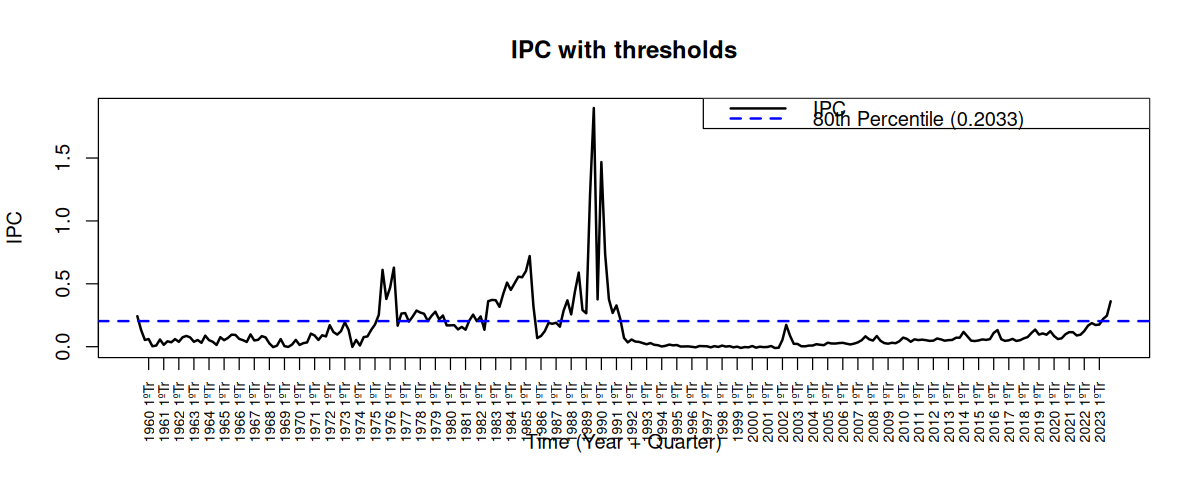

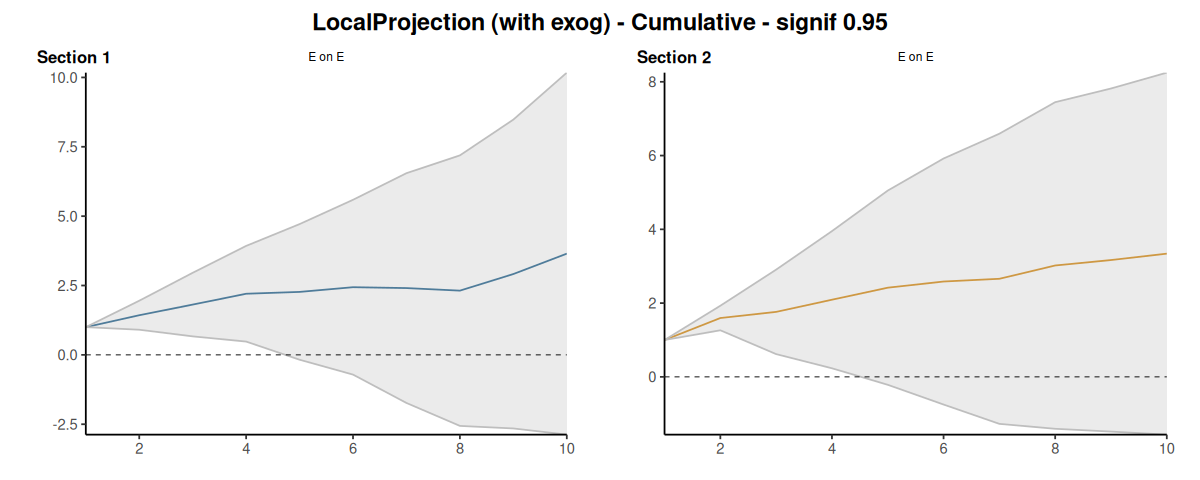

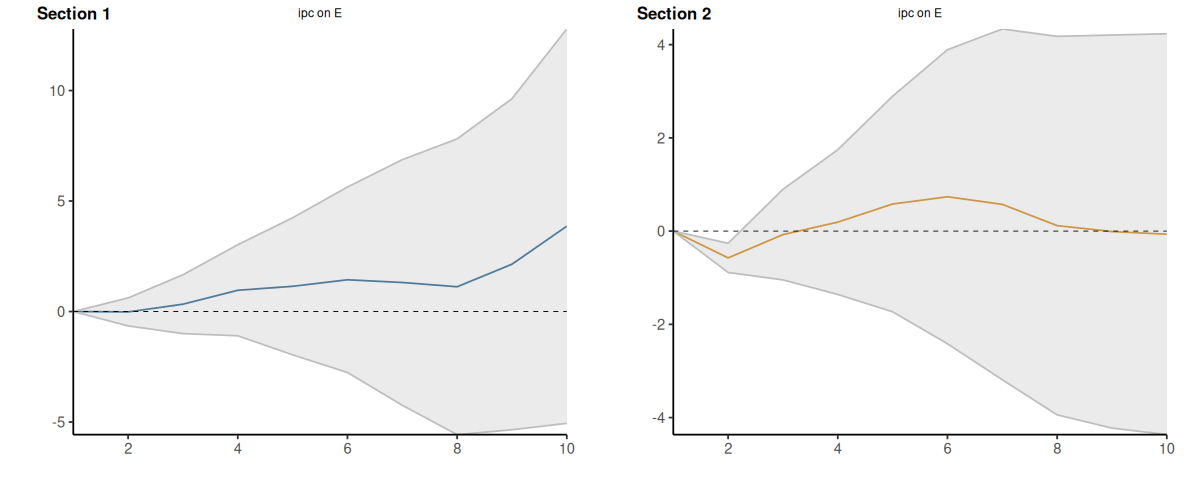

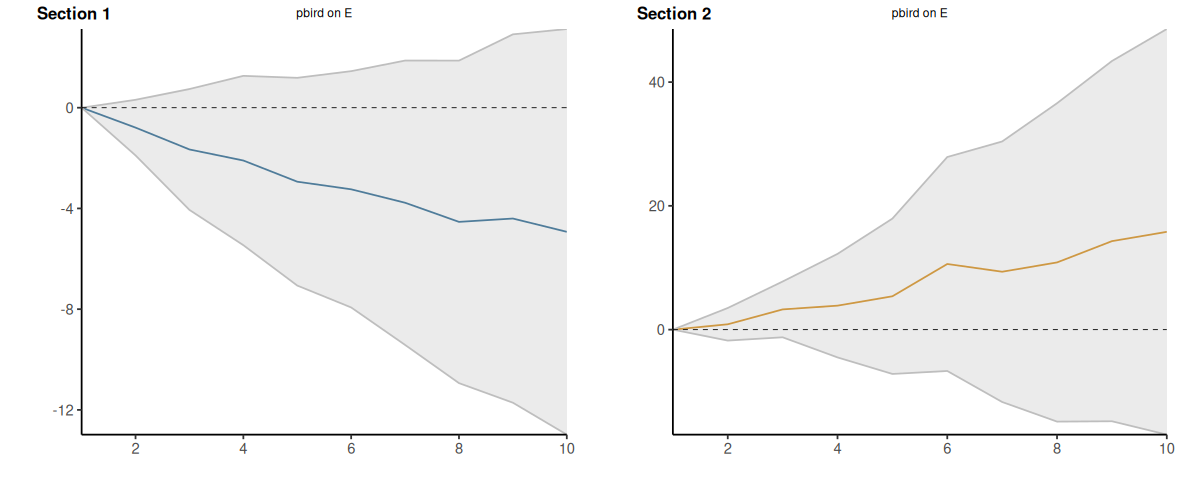

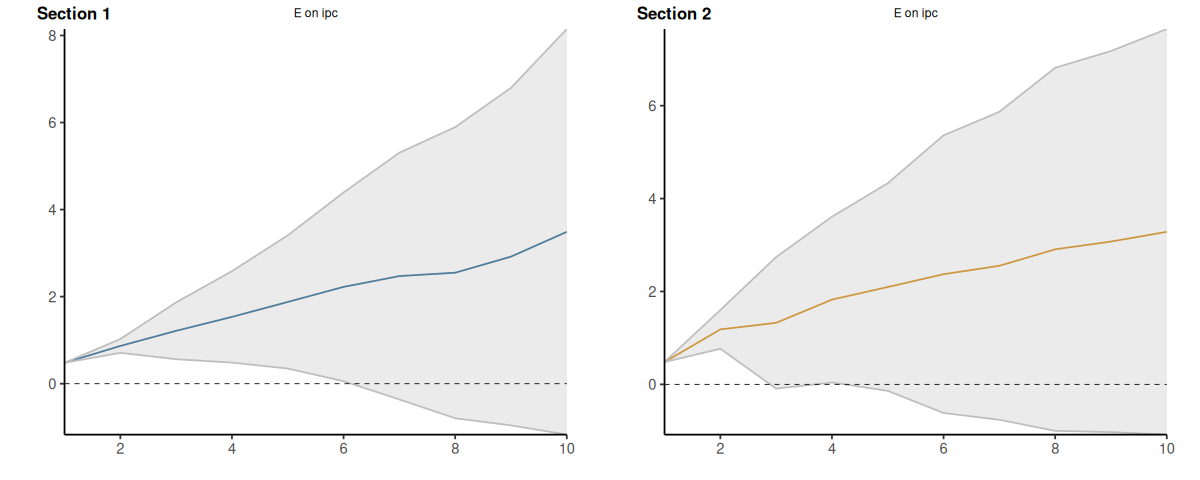

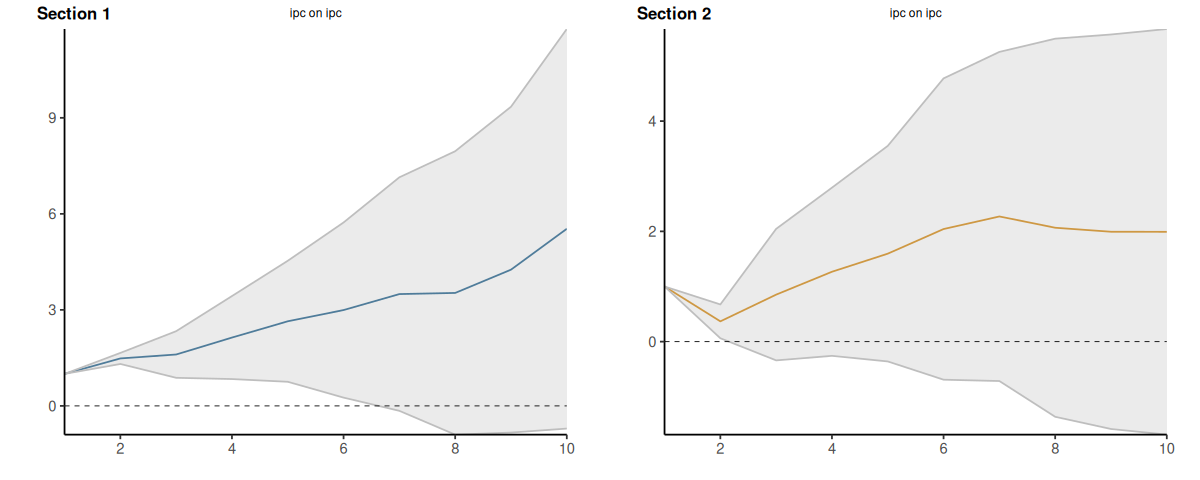

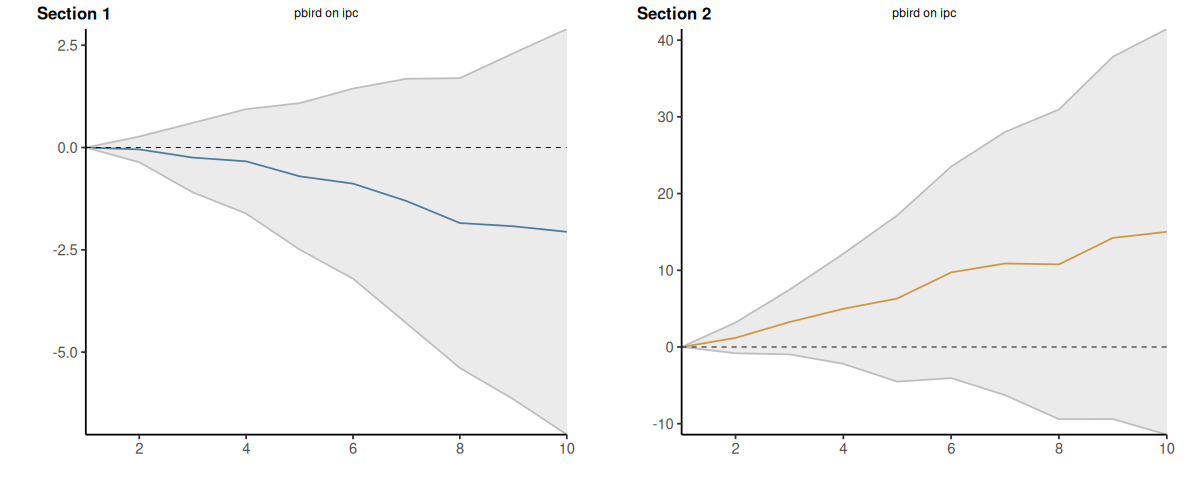

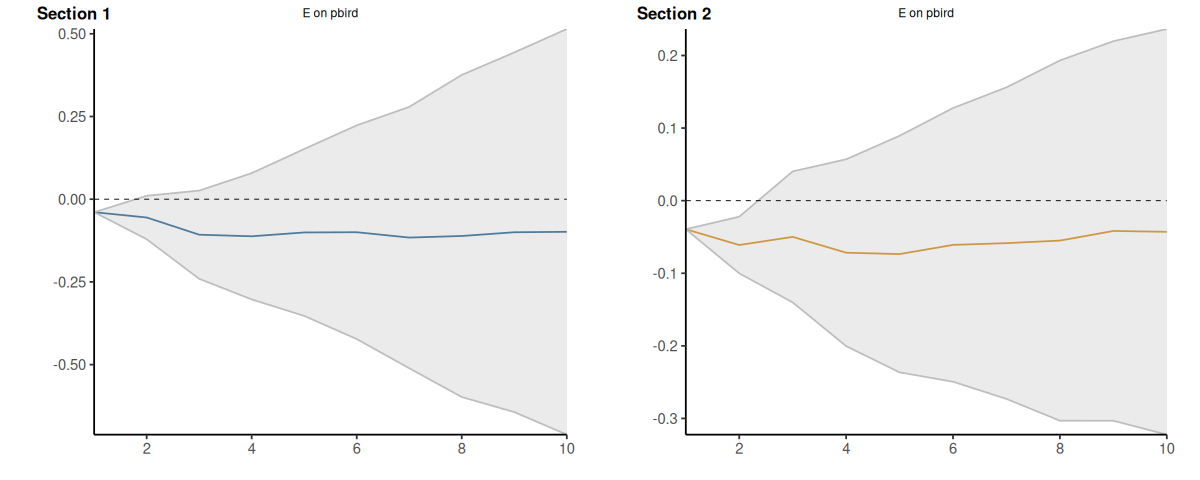

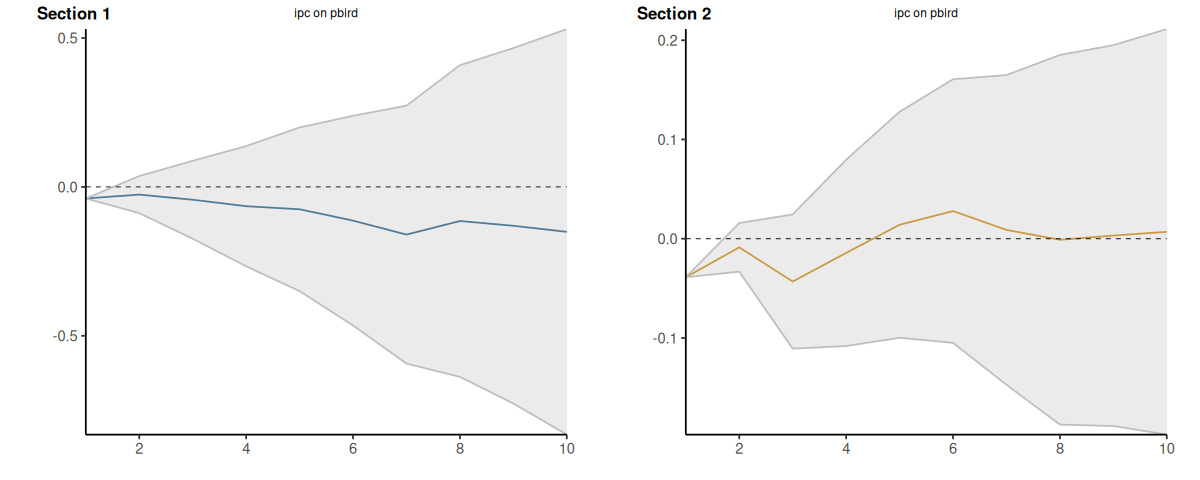

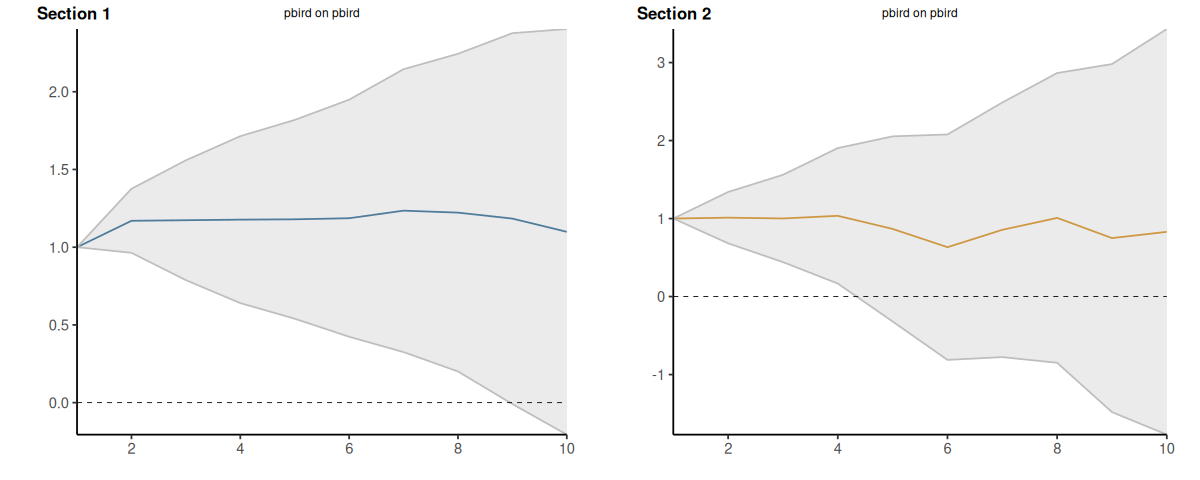

In [7]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = TRUE, threshold_var = 'ipc', upper_threshold = 0.8)

#### Ejemplo excluyendo datos del dataframe menores al umbral inferior
Entonces los gráficos de la izquierda corresponden a "inflacion mediana" y los de la derecha a "inflación alta"

ipc 0.8 0.2 lower

Se descartan los datos por debajo del umbral inferior

Run configurations:

lags_endog_lin,lags_endog_nl,lags_criterion,max_lags,lags_exog,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
NA,NA,AIC,6,6,0,1,0.95,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,207,"E, ipc, pbird",3


Lags for Shock: E

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,5,1,1,1,1,1,6,1,1,1
ipc,5,1,1,1,1,1,1,1,1,1
pbird,1,1,1,1,1,1,1,1,1,1


Lags for Shock: ipc

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,5,1,1,1,1,1,6,1,1,1
ipc,5,1,1,1,1,1,1,1,1,1
pbird,1,1,1,1,1,1,1,1,1,1


Lags for Shock: pbird

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,5,1,1,1,1,1,6,1,1,1
ipc,5,1,1,1,1,1,1,1,1,1
pbird,1,1,1,1,1,1,1,1,1,1


Impulse: E -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.4715600,0.47155996,0.471560,0.471560,0.47155996,0.471560
2,2,0.7970702,0.58342260,1.010718,1.172546,0.73351777,1.611574
3,3,1.0925366,0.21947479,1.965598,1.323697,0.16469173,2.482702
4,4,1.3361150,-0.08748481,2.759715,1.726000,-0.07382901,3.525829
5,5,1.5198741,-0.55987106,3.599619,1.979368,-0.22663340,4.185369
6,6,1.7294761,-1.11789608,4.576848,2.159211,-0.38087959,4.699302
7,7,1.8088792,-1.80141257,5.419171,2.314402,-0.54474327,5.173547
8,8,1.8986245,-2.46760960,6.264859,2.568551,-0.55261267,5.689714
9,9,2.1981080,-2.75792568,7.154142,2.734004,-0.57650241,6.044510


Impulse: E -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1,-0.03954416,-0.03954416,-0.03954416,-0.03954416,-0.03954416,-0.03954416
13,2,-0.04751027,-0.12153708,0.02651654,-0.06268247,-0.10177472,-0.02359022
14,3,-0.09900776,-0.24524942,0.04723390,-0.05042203,-0.13901895,0.03817489
15,4,-0.11026422,-0.31340003,0.09287160,-0.07215503,-0.19383255,0.04952250
16,5,-0.10775012,-0.35975704,0.14425679,-0.07651097,-0.23152789,0.07850594
17,6,-0.12323285,-0.43094805,0.18448235,-0.06439527,-0.24277186,0.11398133
18,7,-0.14914594,-0.52650293,0.22821106,-0.06373264,-0.26939235,0.14192707
19,8,-0.15845775,-0.63658558,0.31967008,-0.05990328,-0.30053140,0.18072484
20,9,-0.15698622,-0.70232087,0.38834844,-0.04596041,-0.30019902,0.20827819


Impulse: ipc -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,1,0.00000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000
24,2,-0.41371408,-1.266351,0.4389225,-0.5908074,-0.9398322,-0.2417827
25,3,-0.42238696,-2.338865,1.4940909,-0.1163787,-1.1153455,0.8825881
26,4,-0.06766406,-3.098125,2.9627964,0.1157745,-1.4983100,1.7298590
27,5,-0.20034669,-4.607300,4.2066070,0.4456577,-1.4460313,2.3373467
28,6,0.03820301,-5.610435,5.6868408,0.3718670,-1.8391474,2.5828813
29,7,0.95250250,-6.016967,7.9219722,0.6587299,-1.8709670,3.1884268
30,8,1.58323977,-6.700221,9.8667010,0.3008238,-2.6615439,3.2631916
31,9,2.93471049,-6.325940,12.1953607,0.2171624,-2.9348319,3.3691568


Impulse: ipc -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,1,-0.0298855350,-0.02988553,-0.02988553,-0.0298855350,-0.02988553,-0.02988553
35,2,0.0004625882,-0.07743206,0.07835724,0.0016787376,-0.02665649,0.03001396
36,3,-0.0191682773,-0.18002087,0.14168432,-0.0344173690,-0.10799191,0.03915718
37,4,-0.0676987690,-0.30069165,0.16529411,-0.0068147989,-0.10595283,0.09232323
38,5,-0.0874729472,-0.39077357,0.21582767,0.0201455784,-0.10072662,0.14101777
39,6,-0.1398340544,-0.51593351,0.23626540,0.0301661995,-0.10935693,0.16968933
40,7,-0.2319571249,-0.68875876,0.22484451,0.0111882419,-0.15430385,0.17668033
41,8,-0.2145685040,-0.77901146,0.34987445,0.0011983101,-0.19764292,0.20003954
42,9,-0.2677163535,-0.91150779,0.37607509,0.0006842112,-0.20663172,0.20800015


Impulse: pbird -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,1,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.000000
46,2,-0.5741096,-1.571315,0.4230959,0.6876041,-1.944983,3.320191
47,3,-0.8171731,-2.996266,1.3619200,2.7240701,-1.995698,7.443838
48,4,-0.9158428,-3.935599,2.1039130,2.9310524,-5.852486,11.714591
49,5,-1.6898927,-5.676473,2.2966873,2.1554200,-11.492941,15.803782
50,6,-2.4348107,-7.356426,2.4868046,4.9700565,-12.180527,22.120640
51,7,-3.2114257,-9.351392,2.9285410,4.1177365,-16.583128,24.818601
52,8,-3.7672896,-10.773509,3.2389298,5.9271918,-19.174982,31.029365
53,9,-2.6784994,-11.184364,5.8273649,9.5175299,-18.808220,37.843280


Impulse: pbird -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000
57,2,-0.05377636,-0.4156928,0.3081400,1.087209,-0.9177264,3.092145
58,3,-0.23061273,-1.4274306,0.9662052,3.794341,0.2187172,7.369965
59,4,-0.37389922,-2.1985272,1.4507287,4.905450,-1.7181937,11.529094
60,5,-0.73689721,-3.1685963,1.6948019,5.840086,-4.5923822,16.272554
61,6,-1.10788105,-4.3343370,2.1185749,7.389226,-5.4589220,20.237373
62,7,-1.57928011,-5.5821865,2.4236263,8.157548,-8.0498036,24.364899
63,8,-2.09167400,-6.8725409,2.6891929,7.582913,-12.1150863,27.280913
64,9,-2.24540556,-7.7932553,3.3024442,10.658259,-12.2179750,33.534492


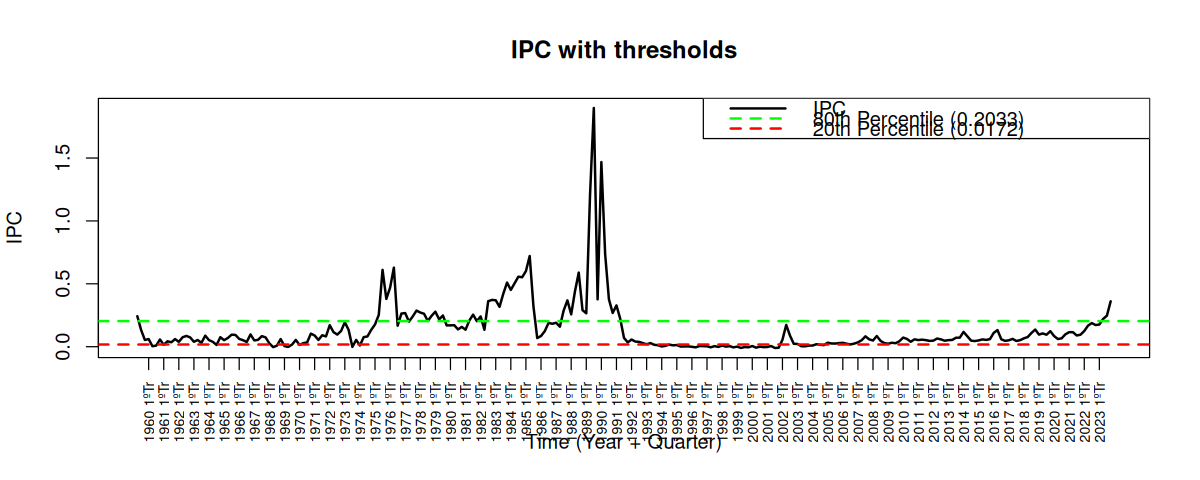

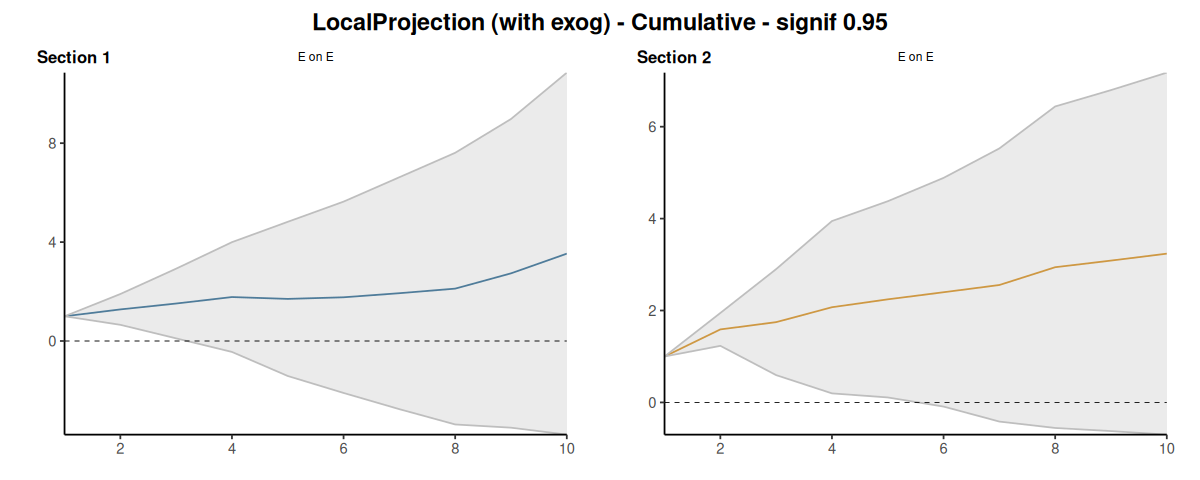

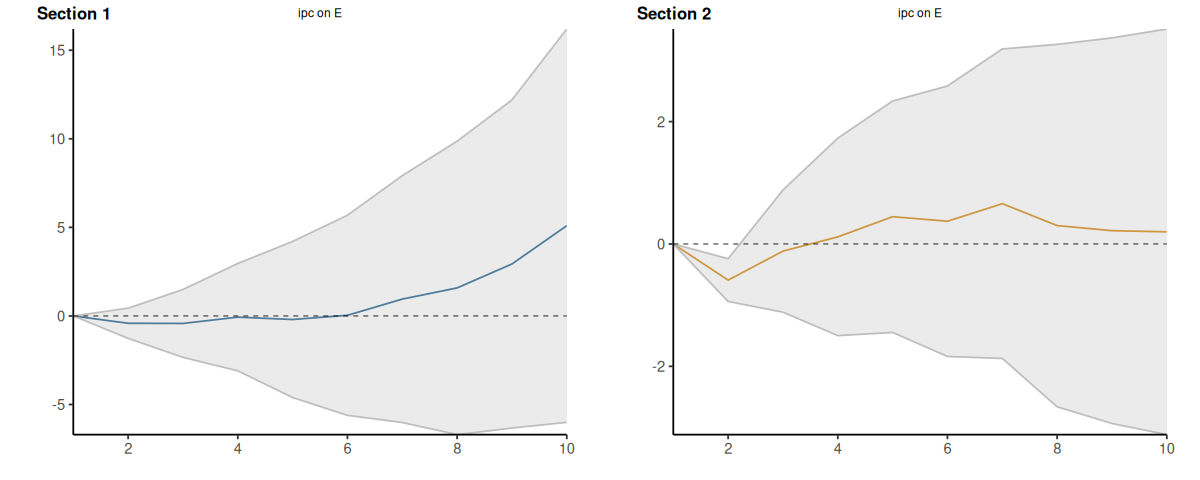

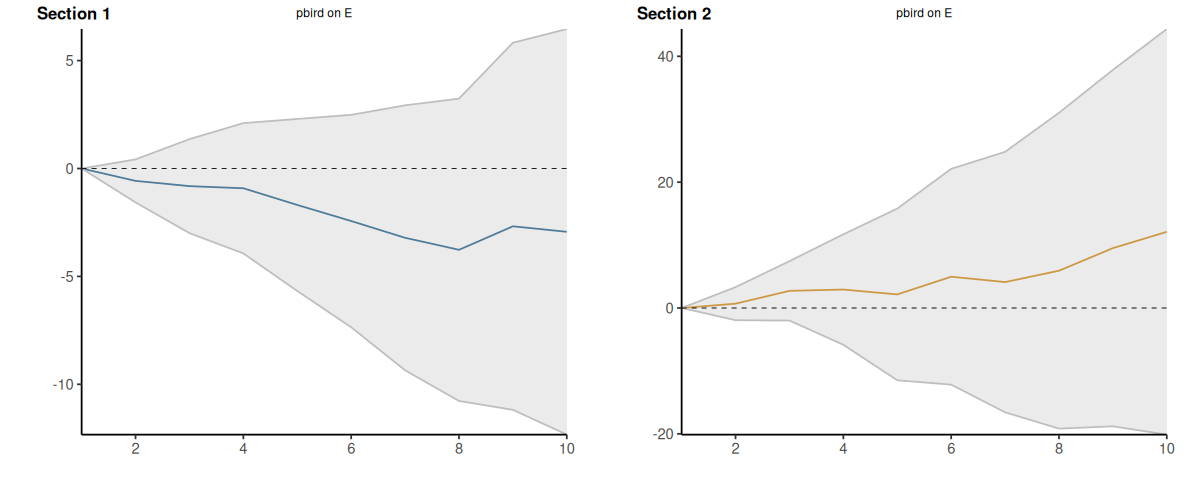

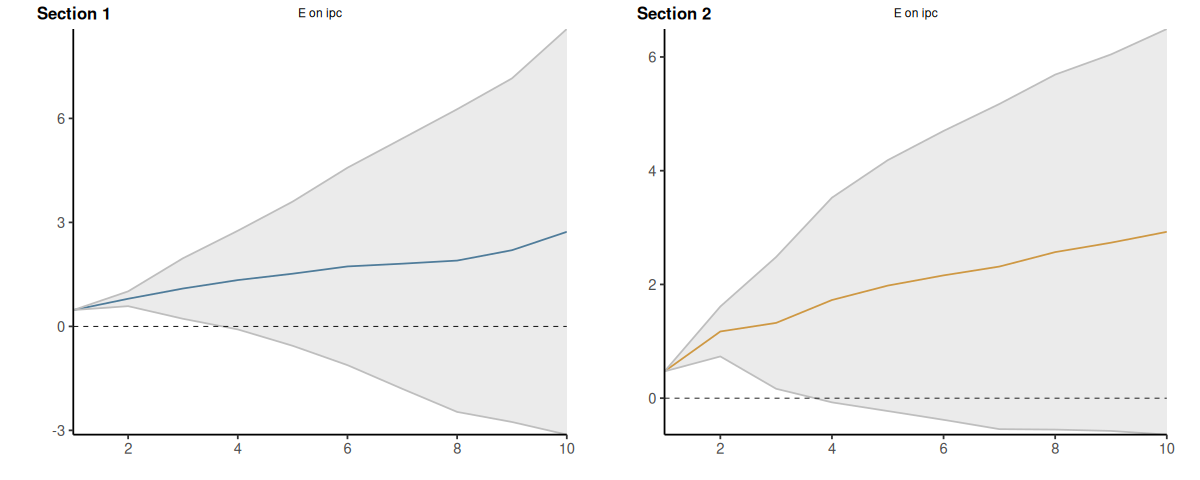

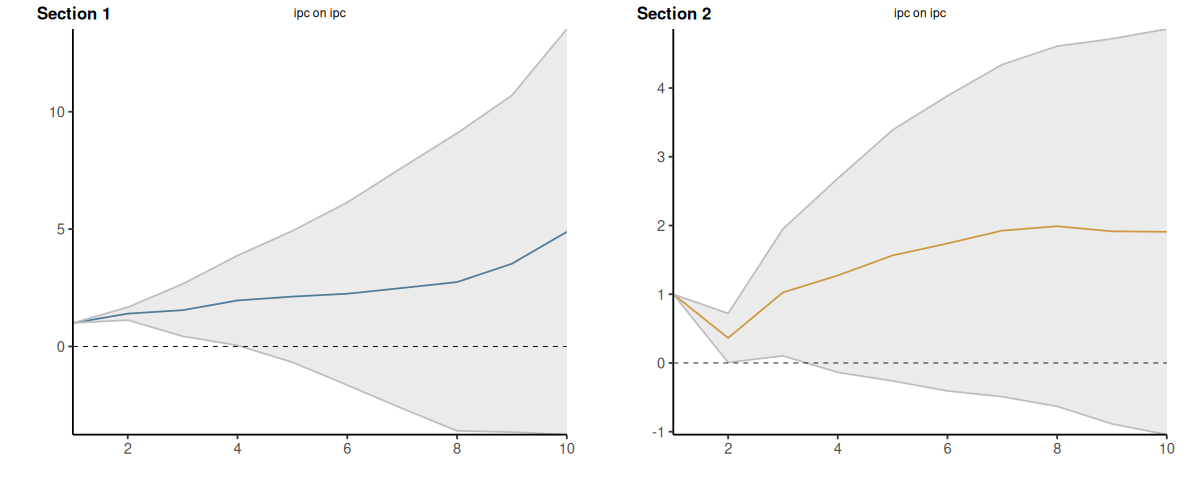

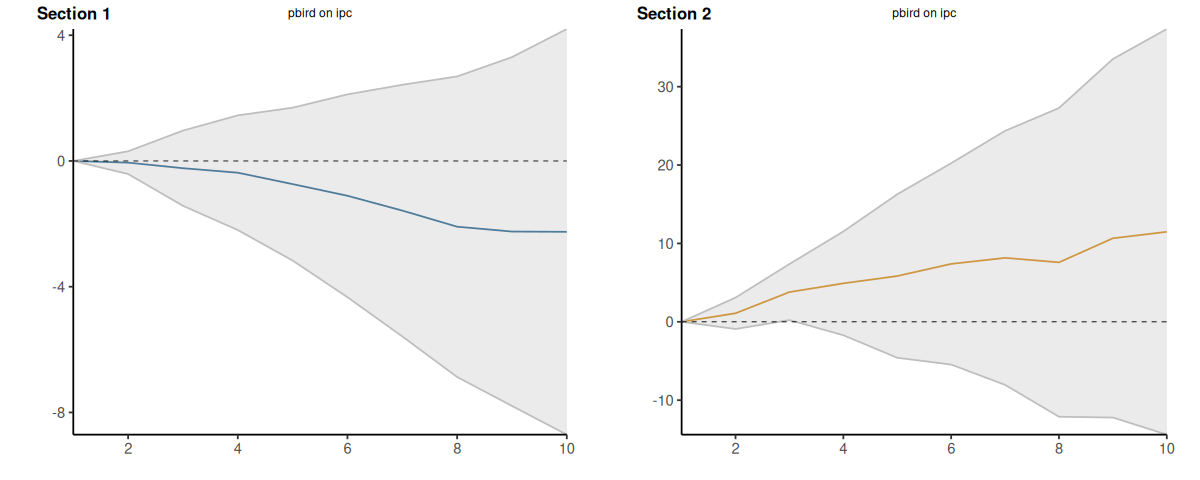

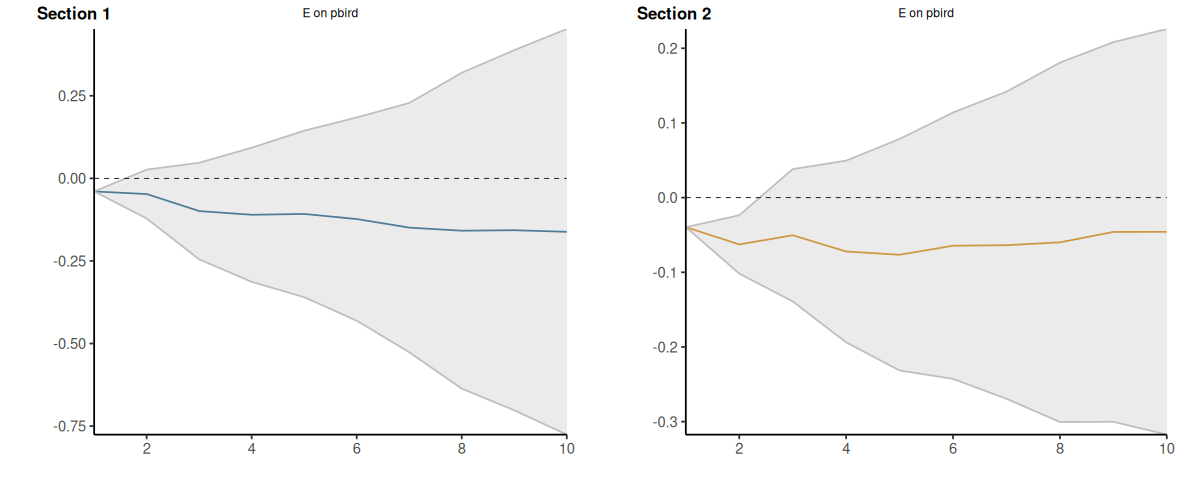

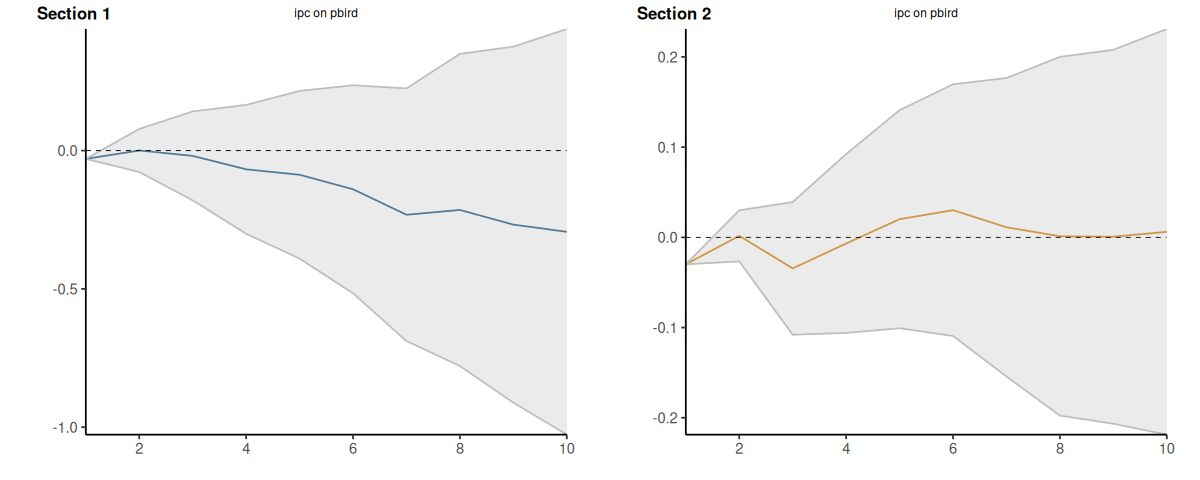

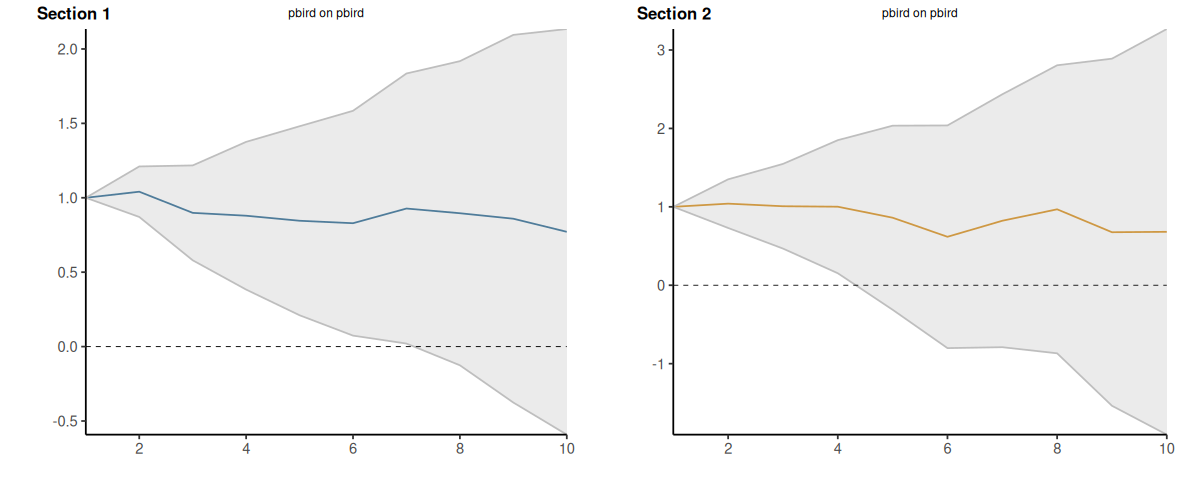

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = TRUE, threshold_var = 'ipc', upper_threshold = 0.8, lower_threshold = 0.20, discard_threshold = 'lower')

In [8]:
stop()

ERROR: Error: 


#### Ejemplo excluyendo datos del dataframe mayores al umbral superior
Entonces los gráficos de la izquierda corresponden a "inflacion mediana" y los de la derecha a "inflación alta"

ipc 0.8 0.2 upper

Se descartan los datos por arriba del umbral superior

Run configurations:

lags_endog_lin,lags_endog_nl,lags_criterion,max_lags,lags_exog,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
NA,NA,AIC,6,6,0,1,0.95,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,207,"E, ipc, pbird",3


Lags for Shock: E

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,1,1,1,4,1,2,1,1,1,1
ipc,1,1,1,1,1,1,2,4,3,2
pbird,1,1,1,1,1,1,1,1,1,1


Lags for Shock: ipc

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,1,1,1,4,1,2,1,1,1,1
ipc,1,1,1,1,1,1,2,4,3,2
pbird,1,1,1,1,1,1,1,1,1,1


Lags for Shock: pbird

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,1,1,1,4,1,2,1,1,1,1
ipc,1,1,1,1,1,1,2,4,3,2
pbird,1,1,1,1,1,1,1,1,1,1


Impulse: E -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.1242163,0.12421631,0.1242163,0.1242163,0.1242163149,0.1242163
2,2,0.3844878,0.03584322,0.7331324,0.2696100,0.1875448733,0.3516751
3,3,0.5994567,-0.19061243,1.3895259,0.3636132,0.1992692567,0.5279572
4,4,0.9006189,-0.38541697,2.1866547,0.3901329,0.1321260878,0.6481397
5,5,1.1390948,-0.73573625,3.0139258,0.4195467,0.0682462953,0.7708471
6,6,1.4289234,-0.95065477,3.8085016,0.4573530,0.0002350009,0.9144711
7,7,1.5613749,-1.24612556,4.3688753,0.5152939,-0.0559857932,1.0865736
8,8,1.3079461,-1.91256195,4.5284541,0.5551559,-0.0876920978,1.1980038
9,9,0.8855048,-2.95702072,4.7280304,0.5321698,-0.2146872687,1.2790269


Impulse: E -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1,-0.04796498,-0.04796498,-0.04796498,-0.04796498,-0.04796498,-0.047964976
13,2,-0.23272730,-0.41072682,-0.05472777,-0.07023938,-0.10854275,-0.031936021
14,3,-0.30228934,-0.73262483,0.12804615,-0.08346558,-0.16570890,-0.001222268
15,4,-0.41472850,-1.26084109,0.43138408,-0.07695589,-0.18655606,0.032644278
16,5,-0.25233606,-1.38519192,0.88051980,-0.05598654,-0.19875315,0.086780071
17,6,-0.37045665,-1.75607648,1.01516317,-0.04325653,-0.23677634,0.150263278
18,7,-0.42503507,-2.10620533,1.25613519,-0.03714015,-0.27453460,0.200254302
19,8,-0.50060636,-2.38930026,1.38808754,-0.04789150,-0.35382121,0.258038215
20,9,-0.63935316,-2.93883884,1.66013253,-0.05541641,-0.39683864,0.286005822


Impulse: ipc -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,1,0.00000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000
24,2,0.30997577,-1.473339,2.093290,0.3698768,-0.2515728,0.9913265
25,3,-0.87458647,-6.087147,4.337974,0.4953692,-0.6638448,1.6545831
26,4,0.09436222,-8.947087,9.135811,0.6347174,-1.0011954,2.2706302
27,5,-0.04693906,-13.690800,13.596922,0.5425347,-1.5369790,2.6220484
28,6,-1.49778451,-21.600433,18.604864,0.6664289,-1.9476710,3.2805289
29,7,-6.97810333,-31.390536,17.434329,0.7537719,-2.3800991,3.8876428
30,8,-8.64784623,-37.442250,20.146558,1.0603131,-2.6831825,4.8038086
31,9,-8.59043116,-39.877230,22.696368,1.5126513,-3.0087758,6.0340783


Impulse: ipc -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,1,0.02910869,0.02910869,0.02910869,0.02910869,0.02910869,0.02910869
35,2,-0.80623408,-1.39211335,-0.22035481,0.03123570,-0.05309130,0.11556271
36,3,-0.95792567,-2.46646772,0.55061639,0.04896635,-0.12208554,0.22001823
37,4,-1.45167765,-3.96872003,1.06536473,0.07666389,-0.19137463,0.34470242
38,5,-0.81466113,-4.37218507,2.74286281,0.11421084,-0.26028766,0.48870935
39,6,-0.20438982,-4.67582771,4.26704807,0.15206505,-0.33674557,0.64087567
40,7,-0.08722055,-5.66604654,5.49160545,0.13394434,-0.46913104,0.73701972
41,8,0.41056982,-6.06588385,6.88702350,0.17378614,-0.55189539,0.89946766
42,9,0.96237087,-6.42695269,8.35169443,0.19360348,-0.62833310,1.01554007


Impulse: pbird -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,1,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000
46,2,-1.713208,-4.338691,0.9122744,-0.3355742,-1.068030,0.3968820
47,3,-4.444923,-10.882182,1.9923356,-0.6347175,-1.857010,0.5875754
48,4,-6.649577,-16.009650,2.7104952,-0.4213855,-2.189732,1.3469610
49,5,-9.564776,-21.150279,2.0207279,-0.4893920,-2.616168,1.6373837
50,6,-8.971874,-21.890952,3.9472045,-0.4773973,-3.031609,2.0768146
51,7,-7.275218,-23.133427,8.5829915,-0.4556111,-3.376843,2.4656212
52,8,-7.493732,-24.874085,9.8866203,-0.7756681,-4.173851,2.6225150
53,9,-7.933371,-27.176105,11.3093637,-1.0321851,-4.969815,2.9054449


Impulse: pbird -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,0.00000000,0.000000,0.0000000,0.00000000,0.0000000,0.0000000
57,2,0.08360676,-0.313890,0.4811036,0.05889731,-0.1435649,0.2613595
58,3,-0.37895956,-1.681766,0.9238473,0.26128352,-0.2383880,0.7609550
59,4,-0.79153983,-3.194498,1.6114183,0.49762974,-0.3880391,1.3832986
60,5,-1.10300417,-4.348032,2.1420233,0.53549410,-0.7090550,1.7800432
61,6,-1.06803895,-4.977588,2.8415106,0.55594417,-0.9733116,2.0851999
62,7,-0.87398441,-5.518887,3.7709183,0.50449867,-1.3364979,2.3454952
63,8,-0.67013191,-5.977173,4.6369093,0.54881773,-1.5576271,2.6552626
64,9,-0.80785770,-6.957200,5.3414849,0.40398372,-1.9461286,2.7540961


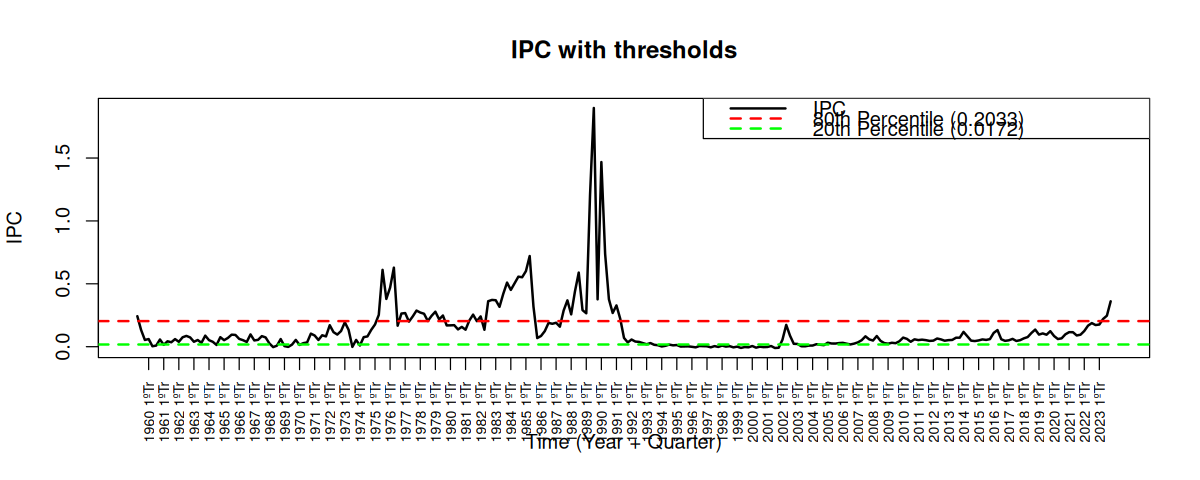

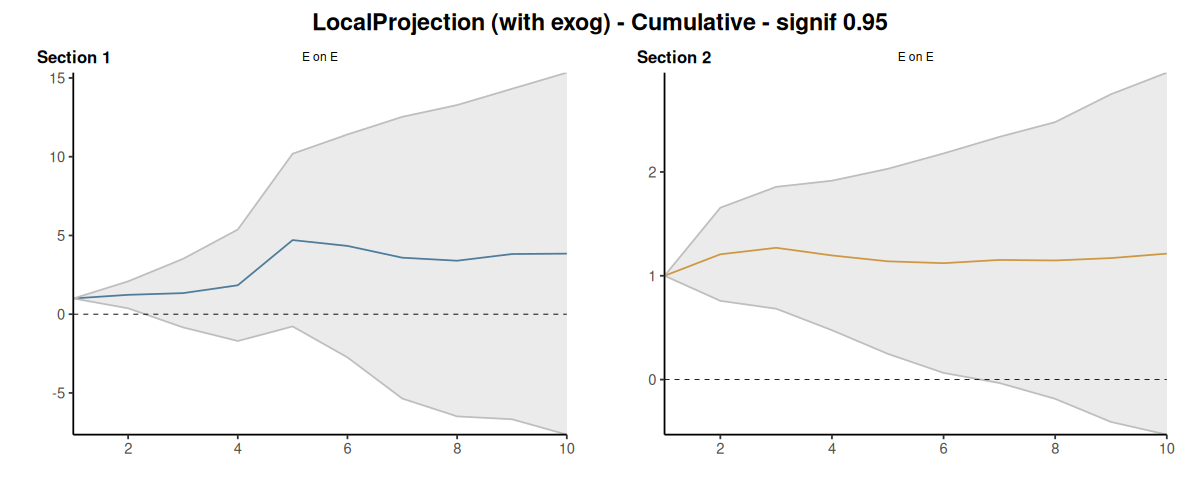

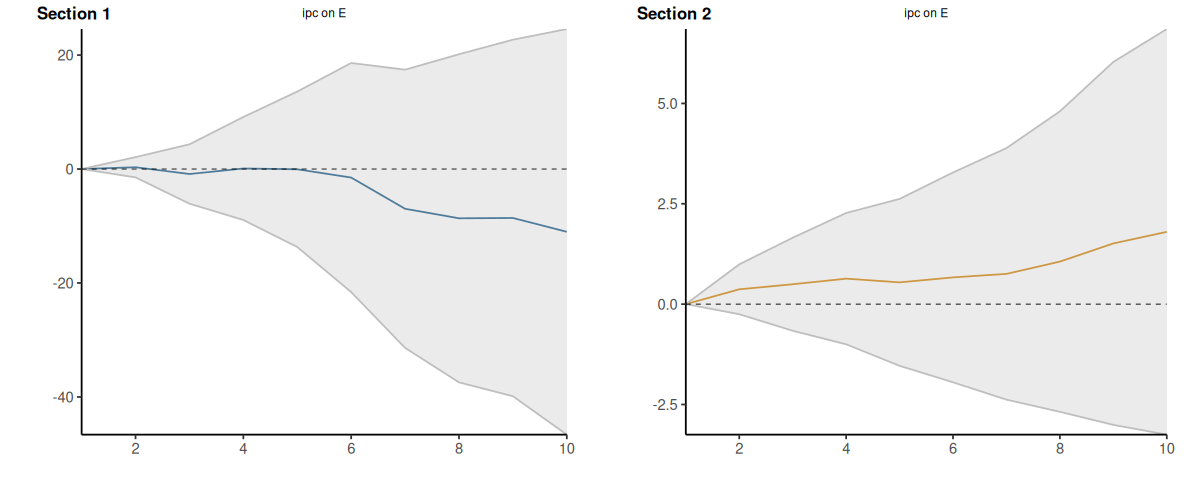

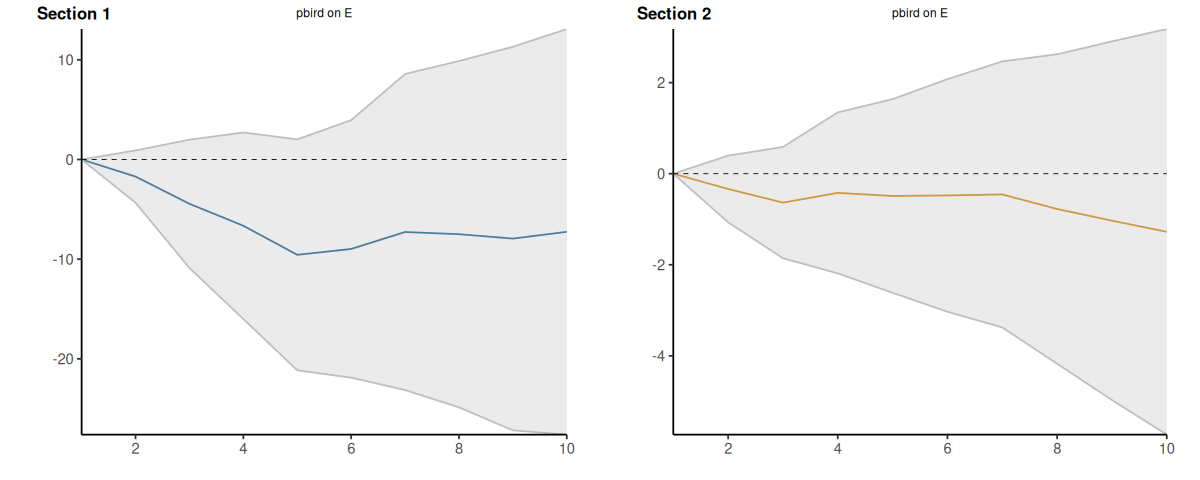

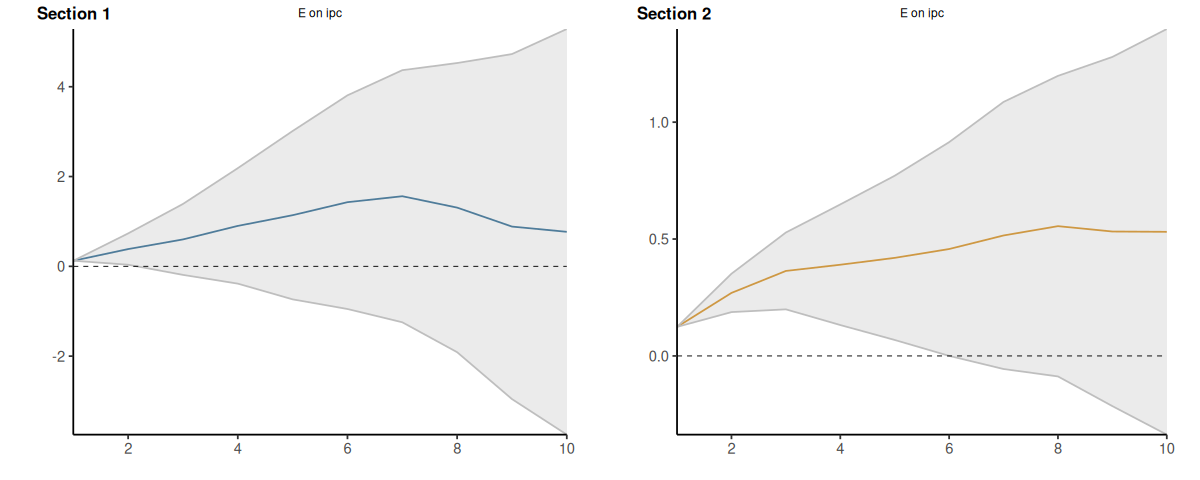

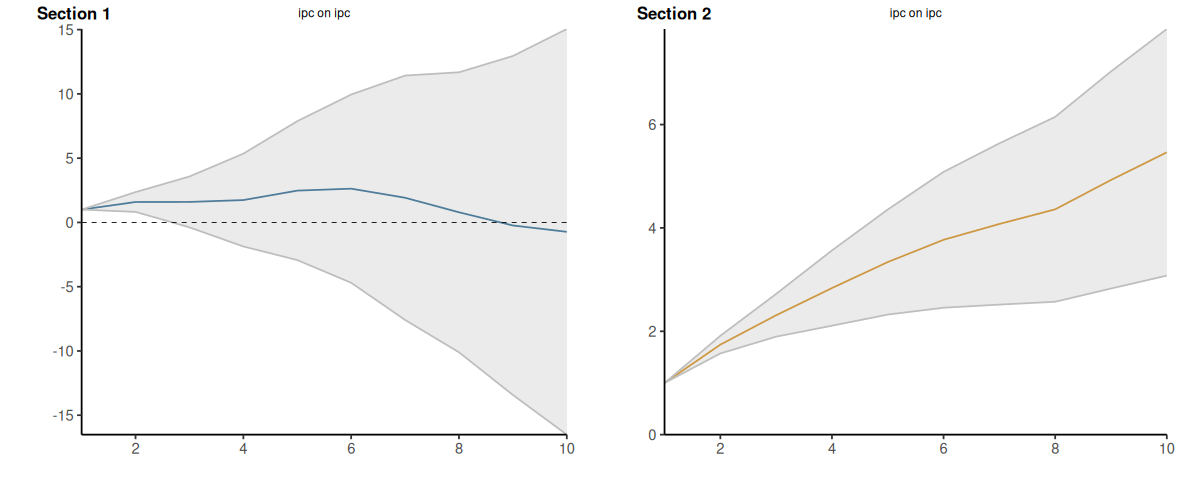

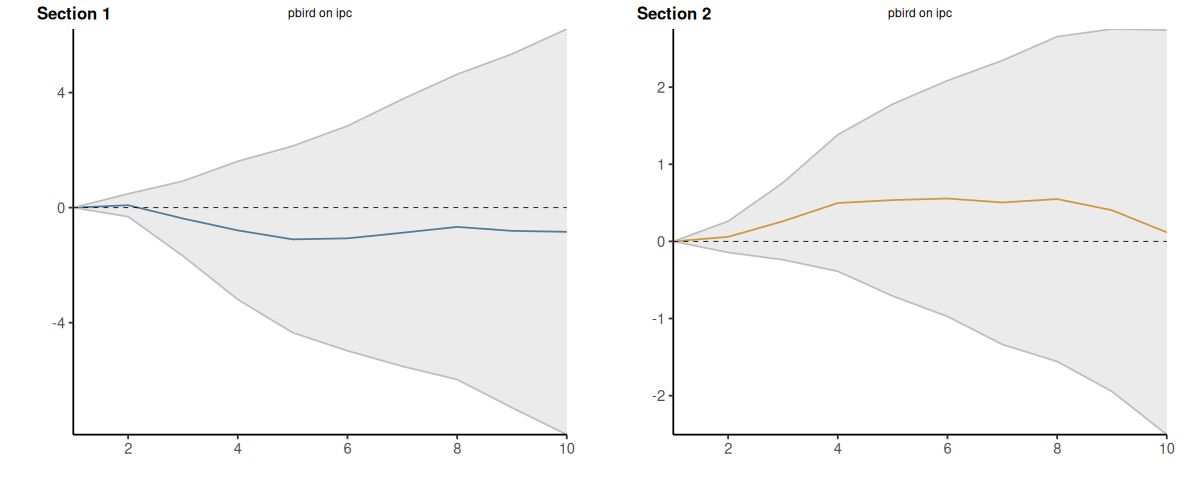

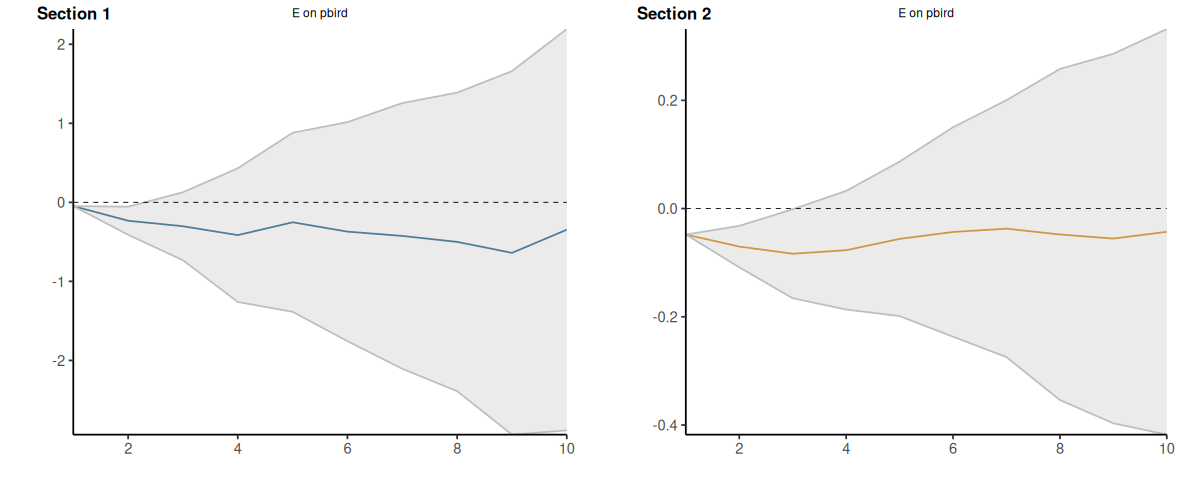

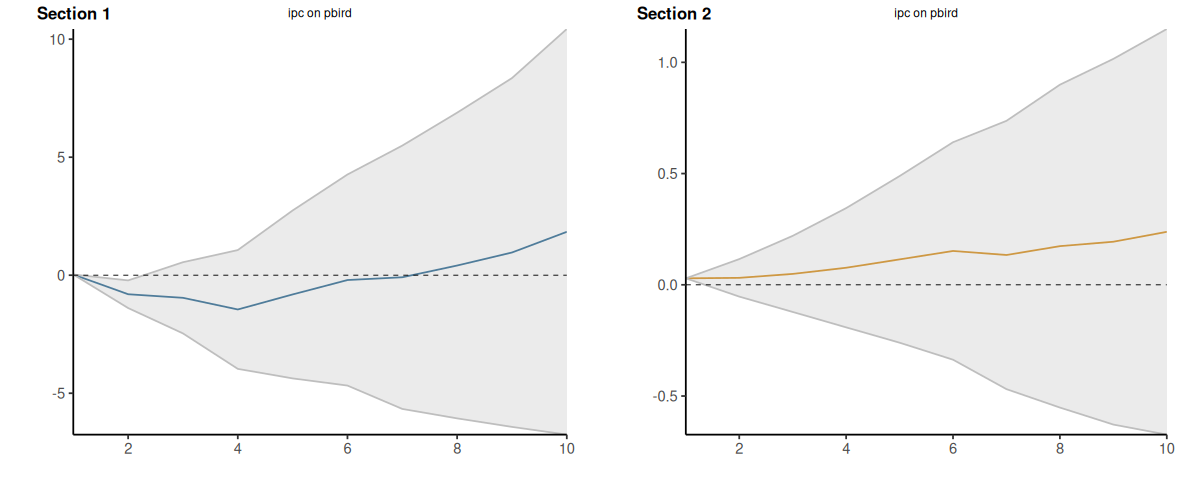

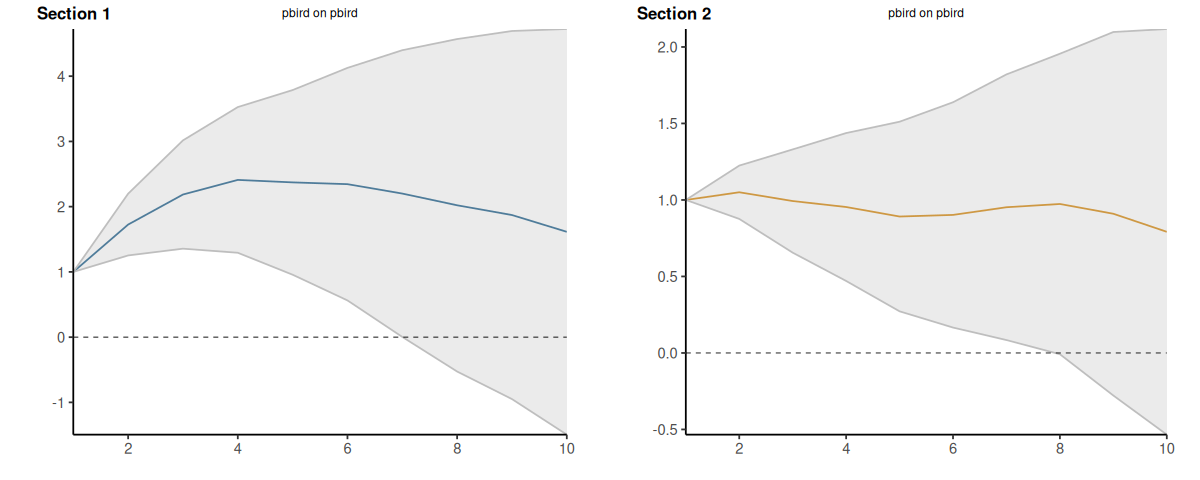

In [9]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = TRUE, threshold_var = 'ipc', upper_threshold = 0.8, lower_threshold = 0.20, discard_threshold = 'upper')

## Ejemplos de semanas anteriores

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = TRUE, threshold_var = 'above_80th_percentile')#, threshold_value = 0.047)

above_80th_percentile 0.8

Threshold sin descartar datos

Upper threshold

ERROR: Error in `$<-.data.frame`(`*tmp*`, "above_upper_p", value = logical(0)): replacement has 0 rows, data has 259


,año,trimestre,ipc,E,Ebc,pbird,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,TOTfmi,D1,above_80th_percentile,above_010
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1959,2ºTr,0.2422910,0.24609683,0.22078171,0.0305918168,0.0010610080,0.0288944660,9.734123e-02,0.003831422,NA,0,1,1
66,1975,2ºTr,0.2528233,0.50396453,0.54210537,-0.0024821955,0.0102602586,-0.1115990798,-6.982378e-02,-0.149889915,NA,0,1,1
67,1975,3ºTr,0.6107895,0.77411624,1.00901914,-0.0342827927,-0.0352475739,0.0564413109,4.985835e-02,0.116900812,NA,0,1,1
68,1975,4ºTr,0.3797316,0.55598107,0.33384264,0.0094609638,0.0007550019,-0.1835418132,-1.411864e-01,-0.028650124,NA,0,1,1
69,1976,1ºTr,0.4695113,0.29471238,1.15375249,0.0064633980,0.0209118898,-0.0169933901,1.356873e-02,-0.024828862,NA,0,1,1
70,1976,2ºTr,0.6284231,0.34298849,0.01626052,-0.0147673447,0.0186716023,0.1473145071,5.122591e-02,-0.033131284,NA,0,1,1
72,1976,4ºTr,0.2634804,0.26802586,0.05775202,0.0101683594,0.0099609504,-0.0462996947,-2.013602e-01,-0.210156356,NA,0,1,1
73,1977,1ºTr,0.2673817,0.50681102,0.17958558,0.0445299110,0.0310183432,0.1557648852,6.463336e-02,-0.014895333,NA,0,1,1
75,1977,3ºTr,0.2405735,0.16286749,0.17067790,0.0179650695,0.0126289482,-0.4309576242,-2.679186e-01,-0.040253112,NA,0,1,1


Threshold var is binary: will not use logistic decomposition

Run configurations:

lags_endog_lin,lags_criterion,max_lags,lags_exog,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
NA,AIC,6,6,0,1,0.95,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,259,"E, ipc, pbird",3


Lags for Shock: E

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,5,1,1,1,1,3,3,1,1,3
ipc,5,2,1,1,1,1,6,1,1,3
pbird,1,1,1,1,1,1,1,1,1,3


Lags for Shock: ipc

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,5,1,1,1,1,3,3,1,1,3
ipc,5,2,1,1,1,1,6,1,1,3
pbird,1,1,1,1,1,1,1,1,1,3


Lags for Shock: pbird

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,5,1,1,1,1,3,3,1,1,3
ipc,5,2,1,1,1,1,6,1,1,3
pbird,1,1,1,1,1,1,1,1,1,3


Impulse: E -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.480558509,0.4805585,0.4805585,0.4805585,0.48055851,0.4805585
2,2,0.884477543,0.7106403,1.0583147,1.0422597,0.57496976,1.5095497
3,3,1.129828544,0.5090669,1.7505902,1.2396908,0.04456846,2.4348132
4,4,1.187519885,0.1195743,2.2554655,1.6273149,-0.11709237,3.3717221
5,5,1.162258892,-0.3685094,2.6930272,1.8981417,-0.20860540,4.0048888
6,6,0.987338277,-1.0416455,3.0163221,2.0959644,-0.30975228,4.5016811
7,7,0.802187375,-1.7897430,3.3941178,2.2509368,-0.44317019,4.9450438
8,8,0.735194450,-2.3959320,3.8663209,2.5536006,-0.53179325,5.6389944
9,9,0.481139770,-3.2973959,4.2596755,2.6726835,-0.58035642,5.9257235


Impulse: E -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1,-0.039352747,-0.03935275,-0.03935275,-0.03935275,-0.03935275,-0.03935275
13,2,-0.046909194,-0.17279294,0.07897455,-0.05661994,-0.09155595,-0.02168392
14,3,-0.065351523,-0.30965556,0.17895252,-0.05429131,-0.14038526,0.03180265
15,4,-0.105121379,-0.46497164,0.25472888,-0.06664439,-0.19967668,0.06638789
16,5,-0.058284063,-0.51745744,0.40088931,-0.06497357,-0.22400928,0.09406213
17,6,-0.007262155,-0.57972029,0.56519598,-0.05083433,-0.23336501,0.13169635
18,7,0.087762242,-0.60107878,0.77660326,-0.04760221,-0.25372868,0.15852426
19,8,0.115767309,-0.66233520,0.89386982,-0.04753568,-0.28649792,0.19142657
20,9,0.116488857,-0.80309817,1.03607589,-0.02833241,-0.28469872,0.22803390


Impulse: ipc -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,1,0.000000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000
24,2,-0.093036053,-0.5945013,0.4084292,-0.54252064,-0.8419761,-0.2430652
25,3,0.004057802,-1.3492211,1.3573367,-0.15260547,-1.0147320,0.7095211
26,4,-0.122445500,-2.4035964,2.1587054,0.09108662,-1.2826473,1.4648206
27,5,-0.445294903,-3.7561897,2.8655999,0.46773896,-1.2106840,2.1461619
28,6,-0.813298211,-5.0862455,3.4596490,0.43595718,-1.5389125,2.4108269
29,7,-1.295564918,-6.8462913,4.2551614,0.44362644,-1.9580716,2.8453245
30,8,-1.826902423,-8.6023243,4.9485194,0.40790260,-2.3414612,3.1572664
31,9,-2.877119947,-10.7810045,5.0267646,0.22167858,-2.6542980,3.0976552


Impulse: ipc -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,1,-0.03877977,-0.03877977,-0.03877977,-0.038779768,-0.03877977,-0.038779768
35,2,0.02658565,-0.06174756,0.11491885,-0.015730283,-0.04040202,0.008941453
36,3,0.07293644,-0.15945386,0.30532674,-0.028936313,-0.09359092,0.035718294
37,4,0.03663435,-0.32112149,0.39439020,-0.014453354,-0.11358543,0.084678719
38,5,0.08108710,-0.39044393,0.55261813,0.005809320,-0.11118391,0.122802551
39,6,0.12152064,-0.51272638,0.75576767,0.018343918,-0.11598146,0.152669295
40,7,0.26931619,-0.52893310,1.06756547,0.009542971,-0.14591983,0.165005767
41,8,0.31066489,-0.59284360,1.21417338,0.015188575,-0.16674632,0.197123470
42,9,0.35471244,-0.70094373,1.41036860,0.009013755,-0.18439677,0.202424278


Impulse: pbird -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,1,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.000000
46,2,-0.4464294,-1.193112,0.3002537,-0.5036964,-3.362863,2.355470
47,3,-1.6314144,-3.944990,0.6821613,1.5060846,-2.841540,5.853709
48,4,-2.3080734,-5.606474,0.9903273,1.7818503,-5.538822,9.102522
49,5,-3.1614261,-7.296587,0.9737346,1.0515568,-9.514274,11.617388
50,6,-3.6443506,-8.452011,1.1633094,3.5850693,-9.836158,17.006296
51,7,-3.7998512,-9.291624,1.6919220,1.1402597,-16.074535,18.355054
52,8,-4.3583940,-10.587642,1.8708537,0.2308899,-19.102301,19.564081
53,9,-5.0129265,-12.247938,2.2220847,4.1814386,-19.774605,28.137482


Impulse: pbird -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000
57,2,-0.03597187,-0.3108038,0.2388601,0.8949037,-0.5006669,2.290474
58,3,-0.28025820,-1.0882667,0.5277503,2.1238399,-0.8943068,5.141987
59,4,-0.55796592,-1.8740417,0.7581098,3.0141632,-2.2036590,8.231985
60,5,-1.05319127,-2.8836282,0.7772457,3.9093072,-4.1824268,12.001041
61,6,-1.58582671,-4.0509587,0.8793053,5.7944269,-4.2030880,15.791942
62,7,-2.01348880,-5.1604941,1.1335165,6.4079561,-5.9758454,18.791758
63,8,-2.48516402,-6.0919698,1.1216417,4.9377232,-10.2415500,20.116996
64,9,-2.98147732,-7.3642712,1.4013166,8.0677094,-10.5979573,26.733376


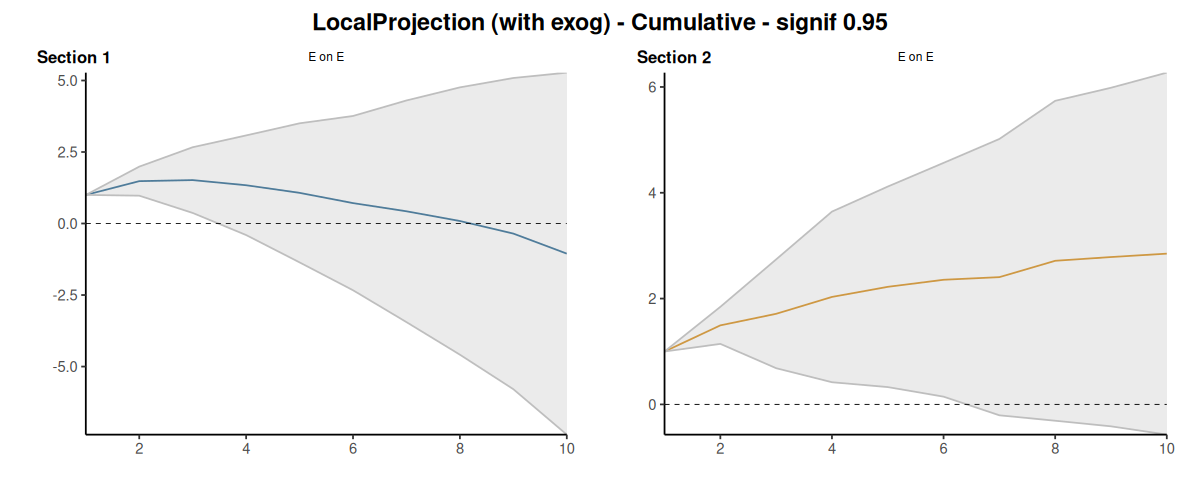

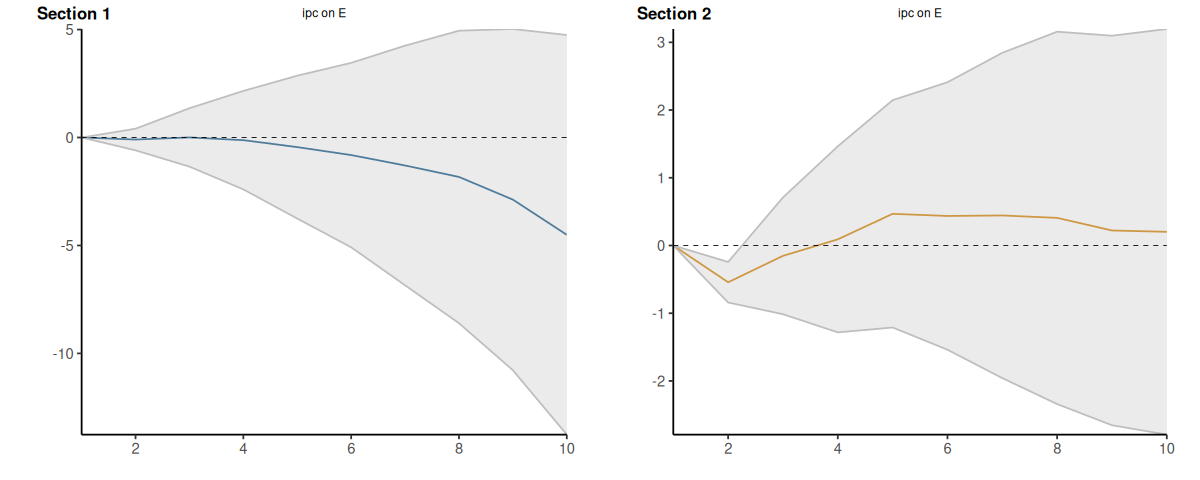

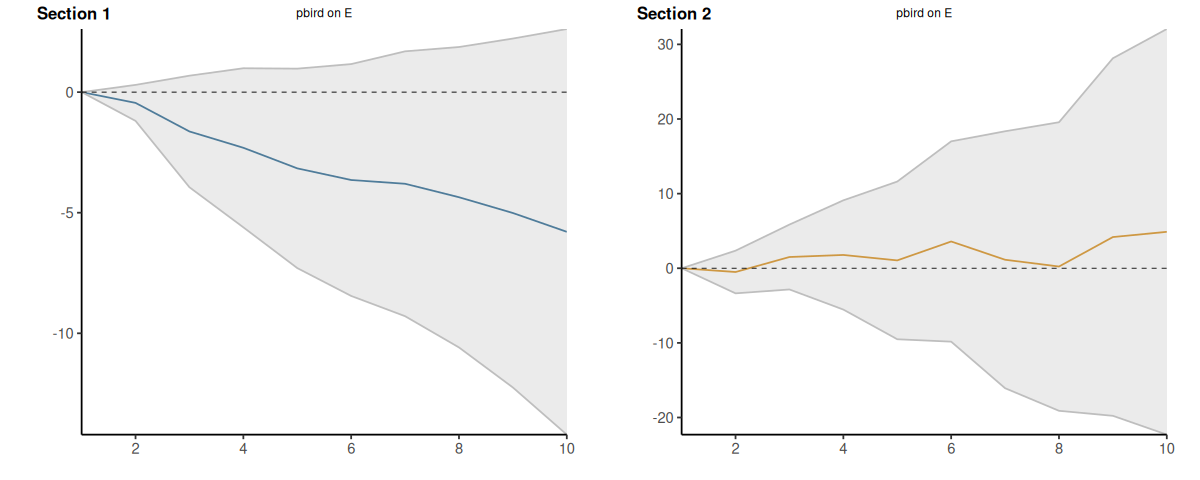

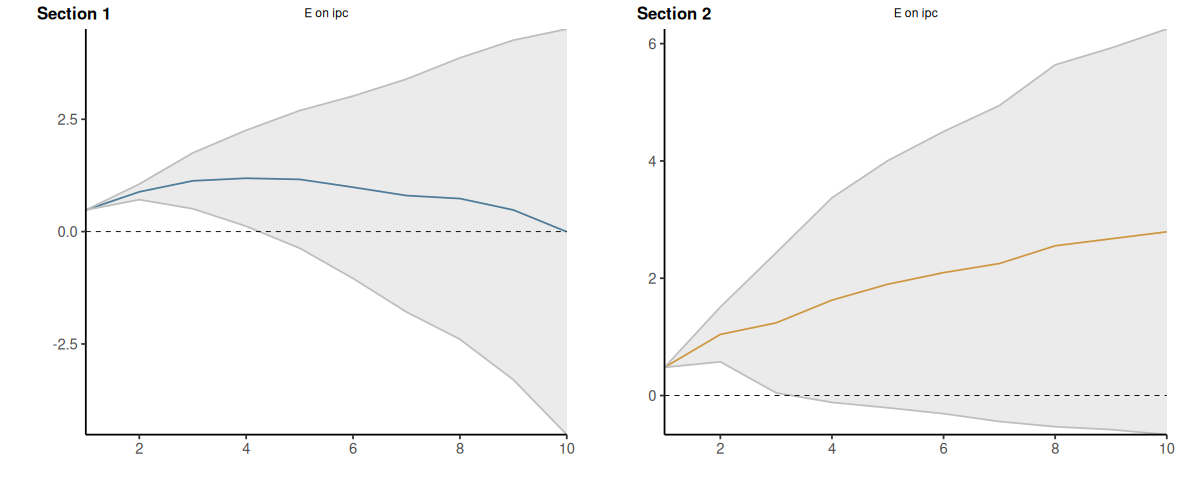

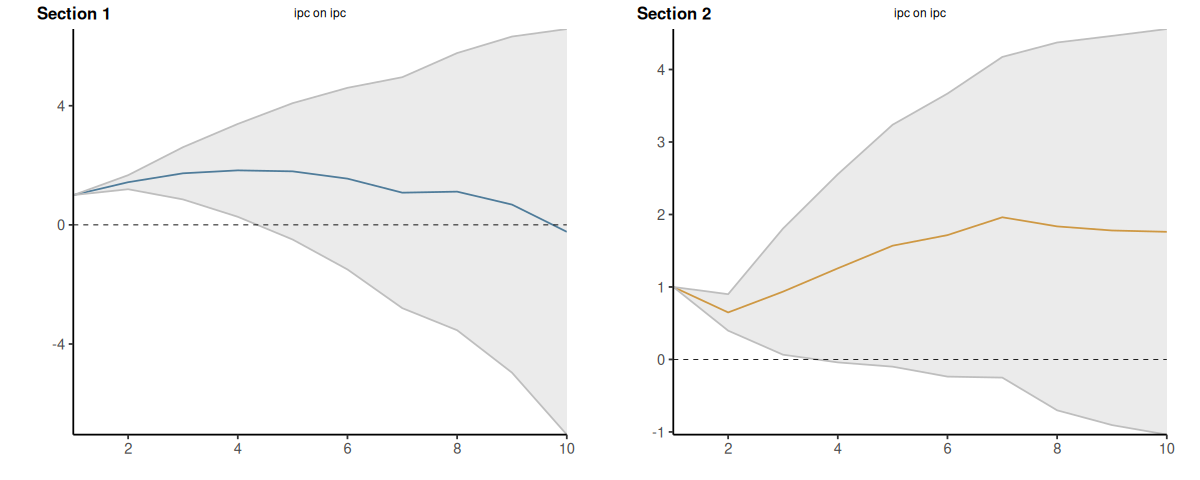

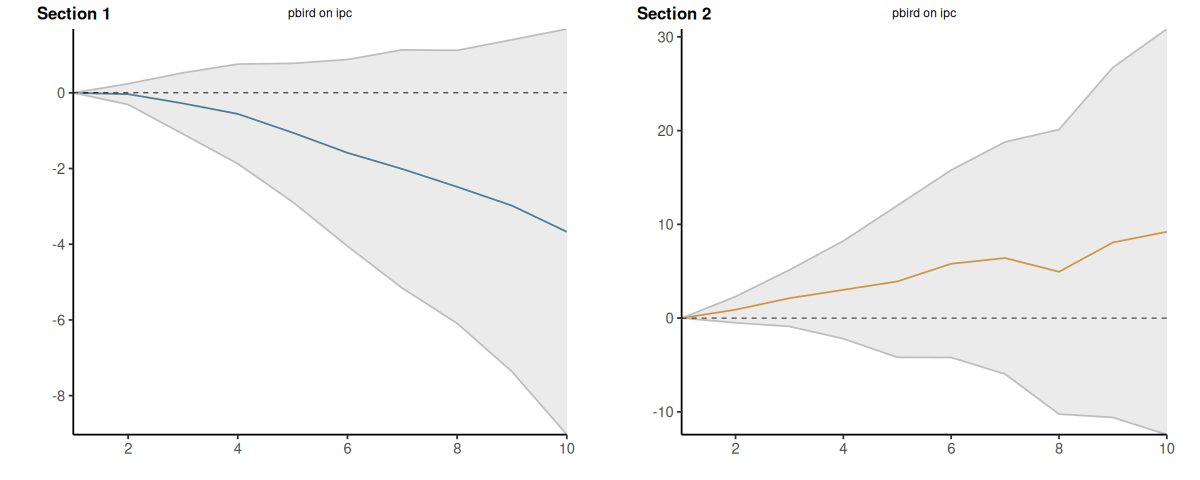

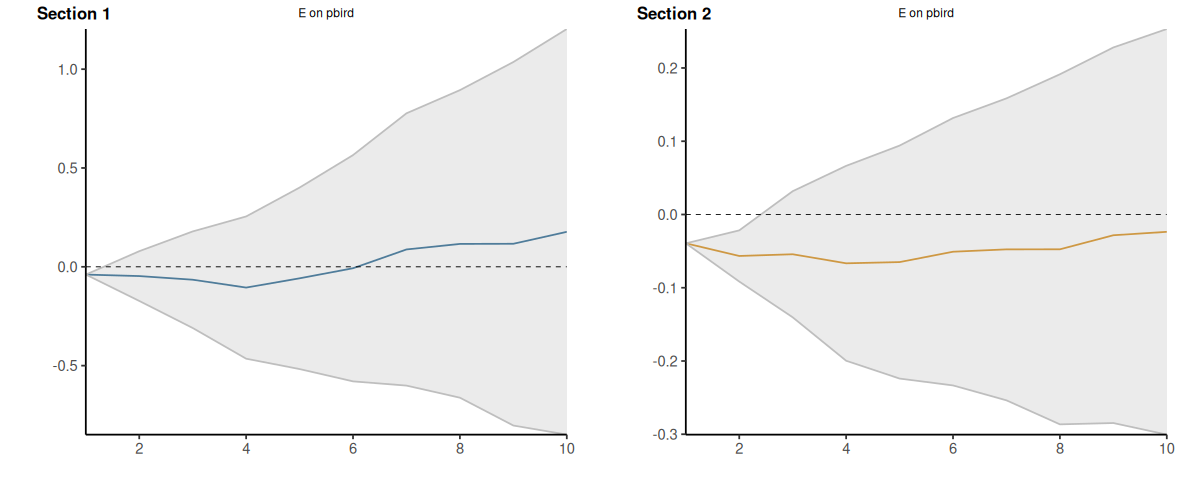

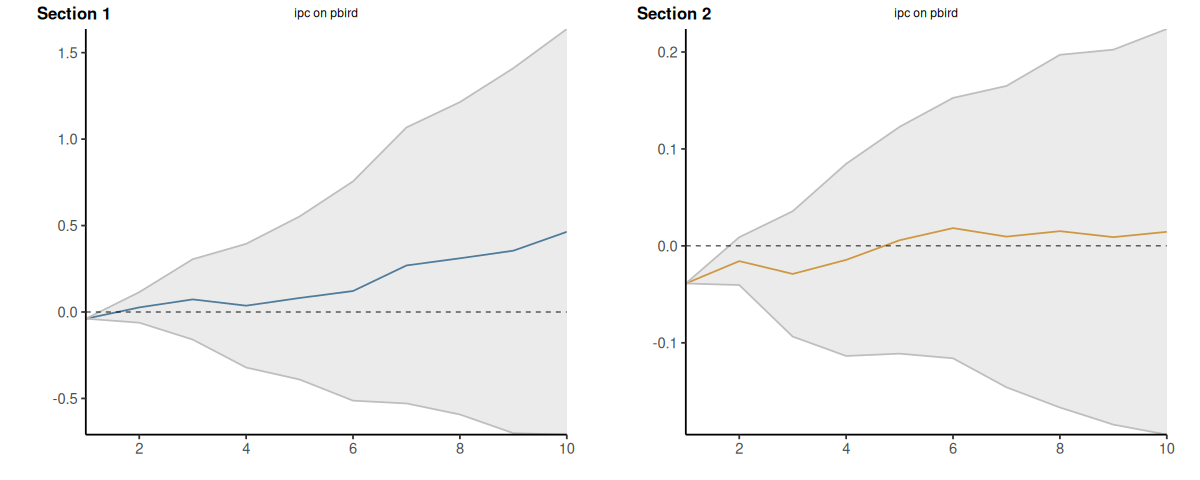

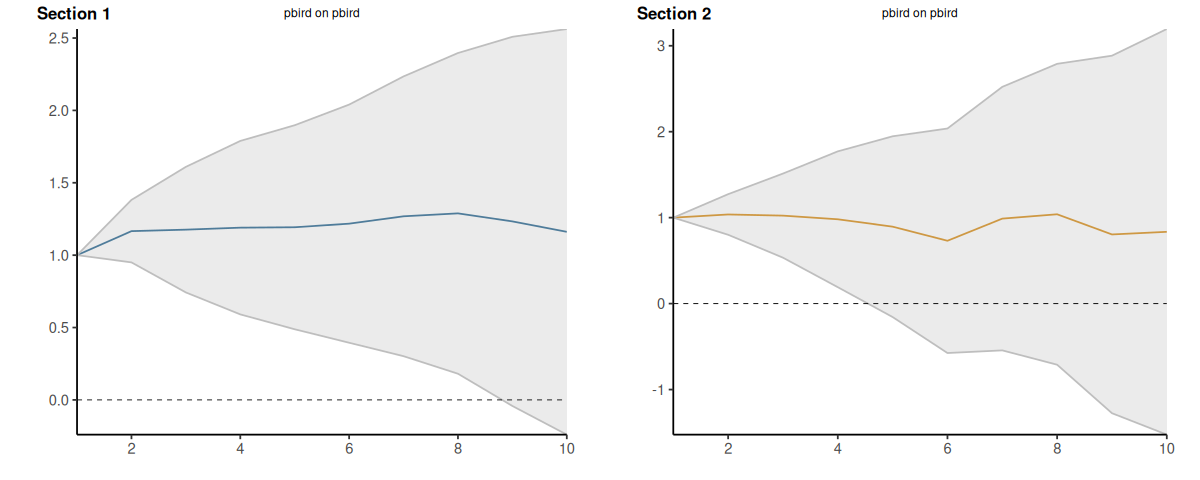

In [ ]:
# Add a new column to mark 1 if ipc > 80th percentile or 0 otherwise
df_ERPT_Arg$above_010 <- ifelse(df_ERPT_Arg$ipc > 0.10, 1, 0)

# Print only the rows where above_80th_percentile is 1
display(df_ERPT_Arg[df_ERPT_Arg$above_80th_percentile == 1, ])
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = TRUE, threshold_var = 'above_010')#, threshold_value = 0.047)

Threshold var is binary: will not use logistic decomposition

Run configurations:

lags_endog_lin,lags_criterion,max_lags,lags_exog,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
NA,AIC,6,6,0,1,0.95,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,161,"E, ipc, pbird",3


Lags for Shock: E

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,2,1,1,1,1,1,1,1,1,2
ipc,5,1,1,1,1,1,1,1,1,1
pbird,1,1,1,1,1,1,1,1,2,2


Lags for Shock: ipc

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,2,1,1,1,1,1,1,1,1,2
ipc,5,1,1,1,1,1,1,1,1,1
pbird,1,1,1,1,1,1,1,1,2,2


Lags for Shock: pbird

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,2,1,1,1,1,1,1,1,1,2
ipc,5,1,1,1,1,1,1,1,1,1
pbird,1,1,1,1,1,1,1,1,2,2


Impulse: E -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.4668392,0.4668392,0.4668392,0.4668392,0.46683919,0.4668392
2,2,0.6878929,0.4192089,0.9565770,1.1735738,0.70266716,1.6444805
3,3,0.8570771,-0.1424934,1.8566477,1.3264519,0.26229675,2.3906071
4,4,0.9792057,-0.6500267,2.6084381,1.7048196,0.04267197,3.3669673
5,5,1.0136187,-1.2864257,3.3136631,1.9402257,-0.11439672,3.9948482
6,6,1.0421336,-2.1546388,4.2389060,2.1159226,-0.24005006,4.4718952
7,7,0.9103312,-3.0940241,4.9146864,2.2190345,-0.45864788,4.8967169
8,8,0.7681240,-4.1346351,5.6708830,2.4381196,-0.50028915,5.3765284
9,9,0.8500740,-4.7323890,6.4325370,2.5930749,-0.54541343,5.7315632


Impulse: E -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1,-0.03663635,-0.03663635,-0.03663635,-0.03663635,-0.03663635,-0.03663635
13,2,-0.03402906,-0.10599959,0.03794146,-0.05739579,-0.09113111,-0.02366047
14,3,-0.06503794,-0.21843946,0.08836358,-0.04626778,-0.11825675,0.02572118
15,4,-0.06791961,-0.28551142,0.14967219,-0.06113815,-0.17442444,0.05214814
16,5,-0.04424489,-0.31166239,0.22317262,-0.06310716,-0.21115546,0.08494114
17,6,-0.06206621,-0.39476297,0.27063055,-0.04524152,-0.21685634,0.12637330
18,7,-0.09895861,-0.51030225,0.31238504,-0.03560470,-0.22974730,0.15853791
19,8,-0.07993997,-0.60424687,0.44436693,-0.02612381,-0.25583599,0.20358837
20,9,-0.05321404,-0.63781643,0.53138834,-0.01538833,-0.26875023,0.23797358


Impulse: ipc -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,1,0.00000000,0.000000,0.0000000,0.0000000,0.000000,0.00000000
24,2,-0.67981856,-1.661328,0.3016911,-0.5068576,-1.044984,0.03126936
25,3,-0.95673387,-3.243621,1.3301531,-0.0817234,-1.175420,1.01197279
26,4,-0.80903534,-4.473536,2.8554658,0.1173384,-1.603992,1.83866904
27,5,-1.35450817,-6.662847,3.9538302,0.3640786,-1.570007,2.29816459
28,6,-1.58683554,-8.407272,5.2336009,0.2806273,-1.969354,2.53060823
29,7,-1.12275281,-9.655377,7.4098709,0.6144989,-1.946871,3.17586868
30,8,-0.90433925,-11.225588,9.4169094,0.6409899,-2.134440,3.41641971
31,9,0.06305966,-11.349678,11.4757977,0.7301506,-2.333354,3.79365474


Impulse: ipc -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,1,-0.02869013,-0.02869013,-0.02869013,-0.028690134,-0.02869013,-0.02869013
35,2,0.02468229,-0.06065459,0.11001918,0.008862687,-0.01418301,0.03190839
36,3,0.01457096,-0.16405671,0.19319863,-0.021520027,-0.08355090,0.04051085
37,4,0.01029757,-0.25261222,0.27320736,0.007429591,-0.08412880,0.09898798
38,5,0.01617849,-0.31511194,0.34746892,0.037958528,-0.07368309,0.14960015
39,6,-0.04902918,-0.45653175,0.35847340,0.036621078,-0.09351781,0.16675997
40,7,-0.11351878,-0.60857477,0.38153721,0.007596642,-0.14500261,0.16019589
41,8,-0.07556746,-0.68443028,0.53329537,-0.011224882,-0.19363987,0.17119010
42,9,-0.09854106,-0.79070784,0.59362572,-0.016357195,-0.21585445,0.18314006


Impulse: pbird -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,1,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.000000
46,2,-1.237463,-2.605795,0.1308692,-0.4523179,-3.320711,2.416075
47,3,-1.292539,-3.667107,1.0820283,0.9383188,-4.385932,6.262570
48,4,-1.266452,-4.596304,2.0633992,1.5864332,-7.817314,10.990180
49,5,-1.766013,-6.167078,2.6350517,1.2597601,-13.421232,15.940753
50,6,-2.171232,-7.556953,3.2144896,4.2309027,-13.654082,22.115888
51,7,-3.145863,-10.096724,3.8049988,4.1948993,-17.552078,25.941877
52,8,-3.475532,-11.532066,4.5810024,4.9793358,-20.227669,30.186341
53,9,-2.224895,-12.100345,7.6505544,7.7687730,-20.187600,35.725145


Impulse: pbird -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000
57,2,-0.1672599,-0.5904647,0.2559448,0.9983746,-0.8772415,2.873991
58,3,-0.2647144,-1.5183089,0.9888802,3.1681778,-0.4141332,6.750489
59,4,-0.2535024,-1.9457040,1.4386993,3.9496166,-2.8825437,10.781777
60,5,-0.7473404,-3.1210426,1.6263618,4.4560578,-6.2718529,15.183969
61,6,-0.9520594,-4.1310455,2.2269267,5.3010983,-7.8825442,18.484741
62,7,-1.0969915,-5.0798208,2.8858377,5.6355651,-10.6220231,21.893153
63,8,-1.5582860,-6.4433521,3.3267801,4.4713029,-15.5066666,24.449272
64,9,-1.4936741,-7.2742530,4.2869048,6.8805268,-15.6672787,29.428332


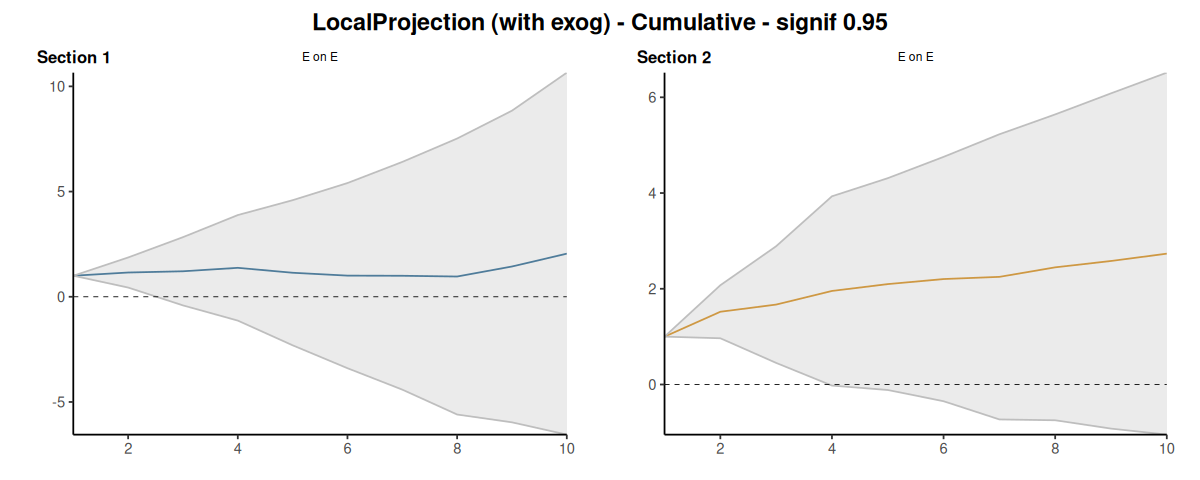

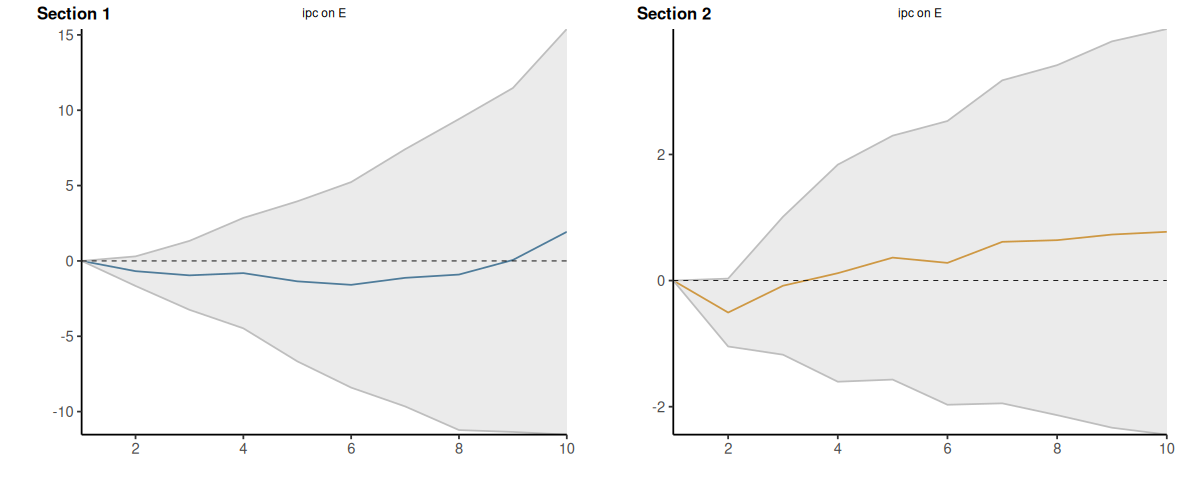

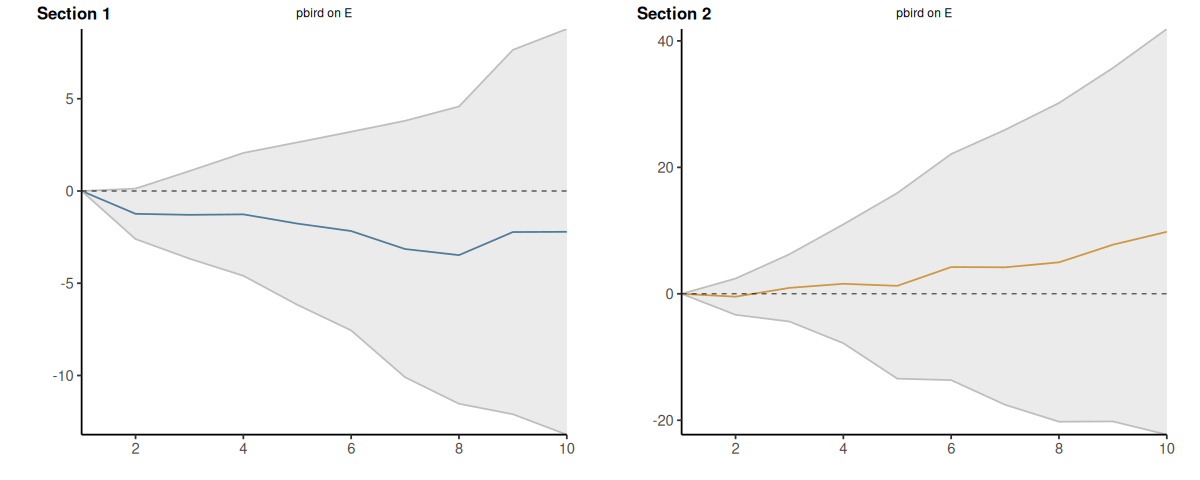

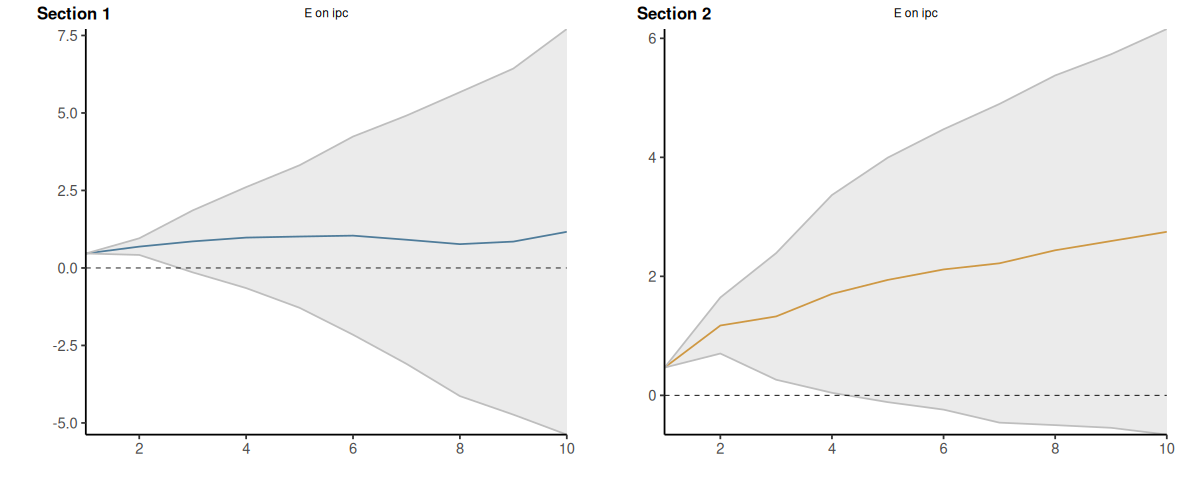

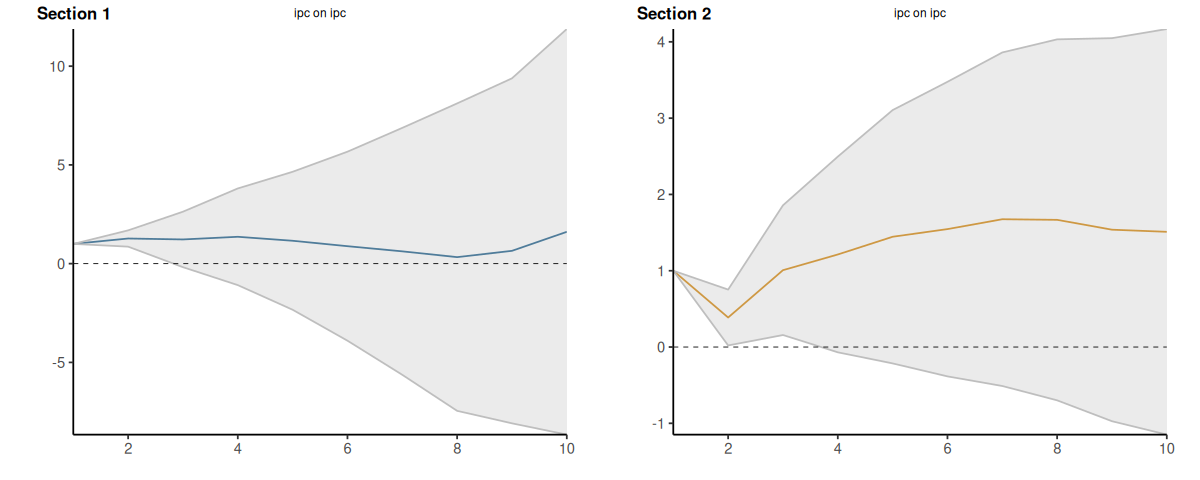

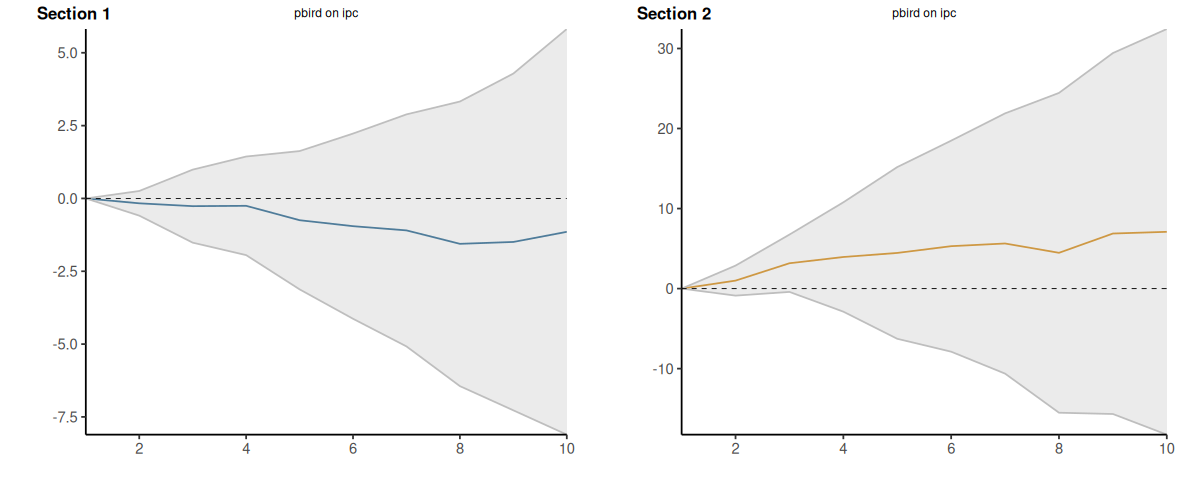

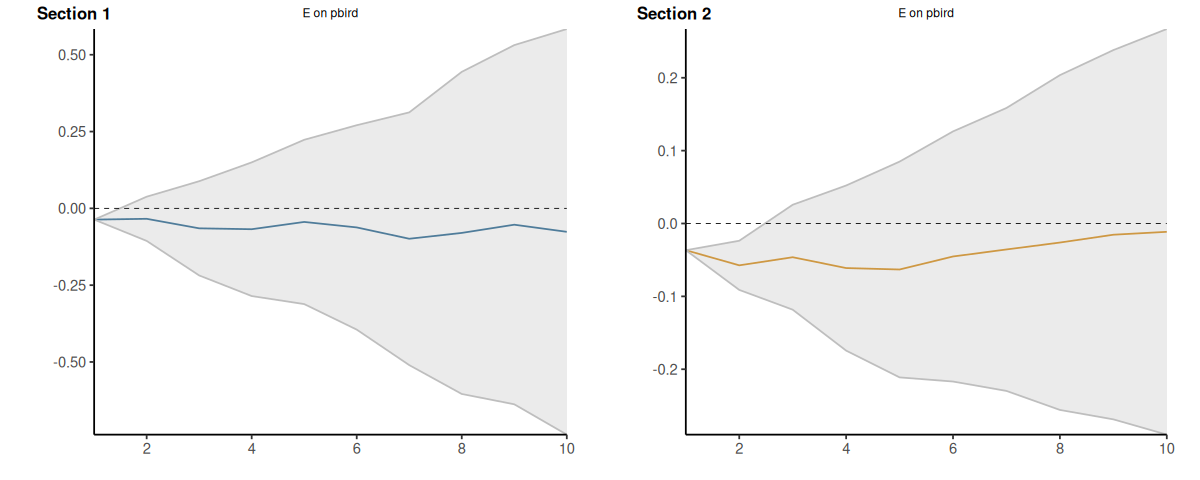

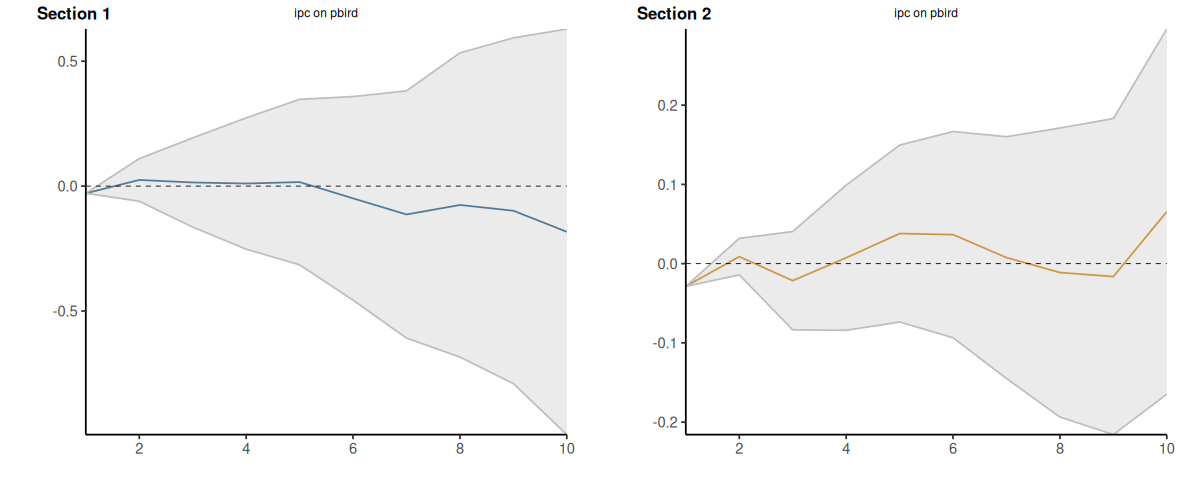

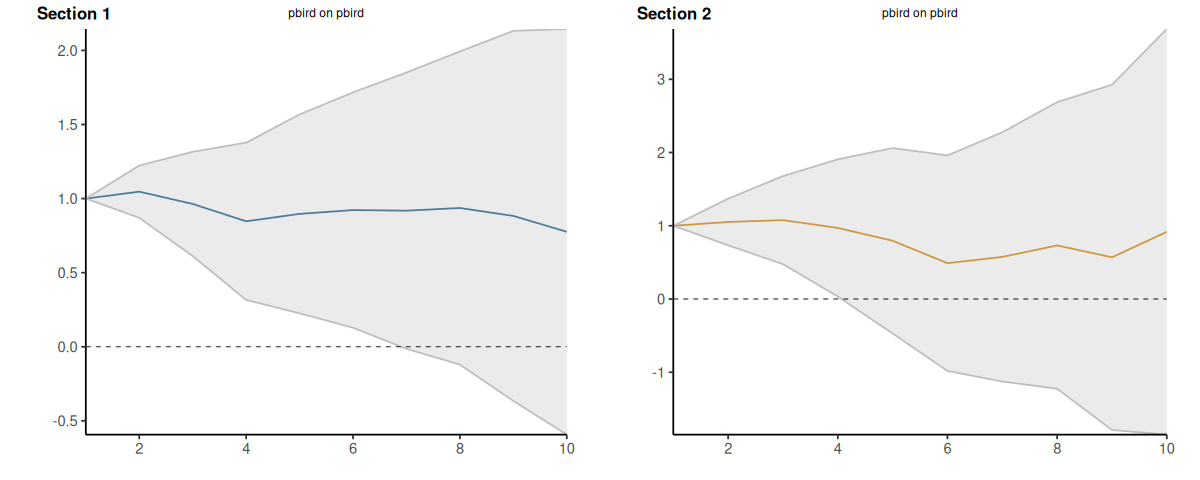

In [ ]:
# Define two new variables based on the specified conditions
df_ERPT_Arg$below_80p_div_4 <- ifelse(df_ERPT_Arg$ipc < (0.2034 / 4), 0, 1)  # Marks 0 if ipc is below 80th percentile threshold
df_ERPT_Arg$above_80p <- ifelse(df_ERPT_Arg$ipc > (0.2034), 1, 0)  # Marks 1 if ipc is above 80th percentile threshold

# Filter the dataframe to exclude rows where below_80p is 0 (too small inflation)
df_filtered <- df_ERPT_Arg[df_ERPT_Arg$below_80p_div_4 == 1, ]

# Call run_lp_model with the filtered dataframe and above_80p as the threshold variable
res <- run_lp_model(df_filtered, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = TRUE, threshold_var = 'above_80p')

Threshold var is binary: will not use logistic decomposition

Run configurations:

lags_endog_lin,lags_criterion,max_lags,lags_exog,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
NA,AIC,6,6,0,1,0.95,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,207,"E, ipc, pbird",3


Lags for Shock: E

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,1,1,1,1,1,6,1,1,1,1
ipc,1,3,1,1,1,1,1,5,3,3
pbird,1,1,1,1,1,1,1,1,1,1


Lags for Shock: ipc

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,1,1,1,1,1,6,1,1,1,1
ipc,1,3,1,1,1,1,1,5,3,3
pbird,1,1,1,1,1,1,1,1,1,1


Lags for Shock: pbird

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,1,1,1,1,1,6,1,1,1,1
ipc,1,3,1,1,1,1,1,5,3,3
pbird,1,1,1,1,1,1,1,1,1,1


Impulse: E -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.1242163,0.124216315,0.1242163,0.1242163,0.12421631,0.1242163
2,2,0.3483046,0.176698826,0.5199103,0.2700027,0.18816664,0.3518387
3,3,0.6384618,0.255452321,1.0214712,0.3644273,0.19517692,0.5336776
4,4,0.8313248,0.282302384,1.3803472,0.3839867,0.11926725,0.6487062
5,5,1.0475949,0.215613781,1.8795759,0.4051762,0.04729535,0.7630571
6,6,1.2991717,-0.002780638,2.6011240,0.4405174,-0.02042498,0.9014597
7,7,1.5878044,-0.184601967,3.3602108,0.4928839,-0.07397014,1.0597379
8,8,1.8875073,-0.223011857,3.9980264,0.5293722,-0.12021743,1.1789618
9,9,1.8697656,-0.737375171,4.4769064,0.5001318,-0.26904797,1.2693117


Impulse: E -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1,-0.04796498,-0.04796498,-0.04796498,-0.04796498,-0.04796498,-0.047964976
13,2,-0.07117263,-0.20750538,0.06516012,-0.06978151,-0.10883056,-0.030732451
14,3,-0.13944706,-0.41714935,0.13825523,-0.07865375,-0.16019882,0.002891328
15,4,-0.14758002,-0.65915613,0.36399609,-0.06715458,-0.17793738,0.043628222
16,5,-0.14243556,-0.83592014,0.55104902,-0.04279045,-0.18652114,0.100940237
17,6,-0.17299448,-1.00009425,0.65410529,-0.03373089,-0.22986475,0.162402975
18,7,-0.21218982,-1.19943157,0.77505193,-0.02141779,-0.25916227,0.216326681
19,8,-0.28850218,-1.41688503,0.83988066,-0.03031321,-0.33636307,0.275736648
20,9,-0.26153150,-1.62886053,1.10579752,-0.03959728,-0.38157408,0.302379517


Impulse: ipc -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,1,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000
24,2,-0.1186499,-1.054927,0.8176275,0.4003412,-0.2763756,1.077058
25,3,-0.8391923,-2.847798,1.1694131,0.5027343,-0.7946390,1.800108
26,4,-0.6861730,-3.802873,2.4305276,0.6633130,-1.1948940,2.521520
27,5,-0.5410568,-5.251516,4.1694023,0.6838523,-1.7895925,3.157297
28,6,-0.4822571,-6.862262,5.8977478,0.7961907,-2.2412410,3.833622
29,7,-2.5505178,-11.054891,5.9538551,0.5228348,-3.0791604,4.124830
30,8,-2.5176742,-12.631727,7.5963789,0.8266826,-3.4109014,5.064266
31,9,-2.4903857,-13.994837,9.0140654,1.2605505,-3.8127634,6.333865


Impulse: ipc -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,1,0.02910869,0.02910869,0.02910869,0.02910869,0.02910869,0.02910869
35,2,0.02010067,-0.27882893,0.31903027,0.03604230,-0.05336600,0.12545059
36,3,0.12919043,-0.41943346,0.67781431,0.05963342,-0.11942546,0.23869229
37,4,0.36170097,-0.51118323,1.23458517,0.10241909,-0.17778907,0.38262725
38,5,0.52685374,-0.72474179,1.77844926,0.14047453,-0.25085056,0.53179962
39,6,0.42135171,-1.14862443,1.99132785,0.16462985,-0.34896705,0.67822674
40,7,0.64504106,-1.27763938,2.56772149,0.16174698,-0.47287769,0.79637166
41,8,0.71345224,-1.50973382,2.93663830,0.20297788,-0.55533606,0.96129181
42,9,0.79474769,-1.74987344,3.33936882,0.22670672,-0.63249216,1.08590560


Impulse: pbird -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,1,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.0000000
46,2,-0.6548635,-2.564826,1.255099,-0.5011958,-1.278505,0.2761138
47,3,-2.3624761,-7.192540,2.467588,-0.7443074,-1.991017,0.5024018
48,4,-3.3517888,-10.157048,3.453470,-0.5637915,-2.379498,1.2519148
49,5,-3.8209215,-11.605477,3.963634,-0.7786146,-3.191547,1.6343178
50,6,-4.0349637,-12.810347,4.740419,-0.5569033,-3.584694,2.4708872
51,7,-3.0473493,-13.339862,7.245163,-0.4652327,-3.901847,2.9713812
52,8,-3.6578477,-15.241251,7.925556,-0.6727150,-4.589039,3.2436094
53,9,-4.0975421,-16.978732,8.783647,-0.8665588,-5.421675,3.6885573


Impulse: pbird -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,0.00000000,0.0000000,0.0000000,0.000000000,0.0000000,0.0000000
57,2,0.16099748,-0.1470769,0.4690719,0.003408164,-0.2475382,0.2543545
58,3,-0.00618999,-0.8912219,0.8788419,0.178169285,-0.3216658,0.6780043
59,4,-0.19570095,-1.7750512,1.3836493,0.446317433,-0.5296881,1.4223229
60,5,-0.39494292,-2.4335670,1.6436811,0.528582447,-0.8973582,1.9545231
61,6,-0.41579632,-2.8249514,1.9933587,0.549093939,-1.2140529,2.3122407
62,7,-0.54041081,-3.3263221,2.2455004,0.552956813,-1.5962329,2.7021465
63,8,-0.66994985,-3.8358789,2.4959792,0.649199371,-1.9516670,3.2500658
64,9,-0.92748431,-4.5378133,2.6828447,0.487075278,-2.4387069,3.4128575


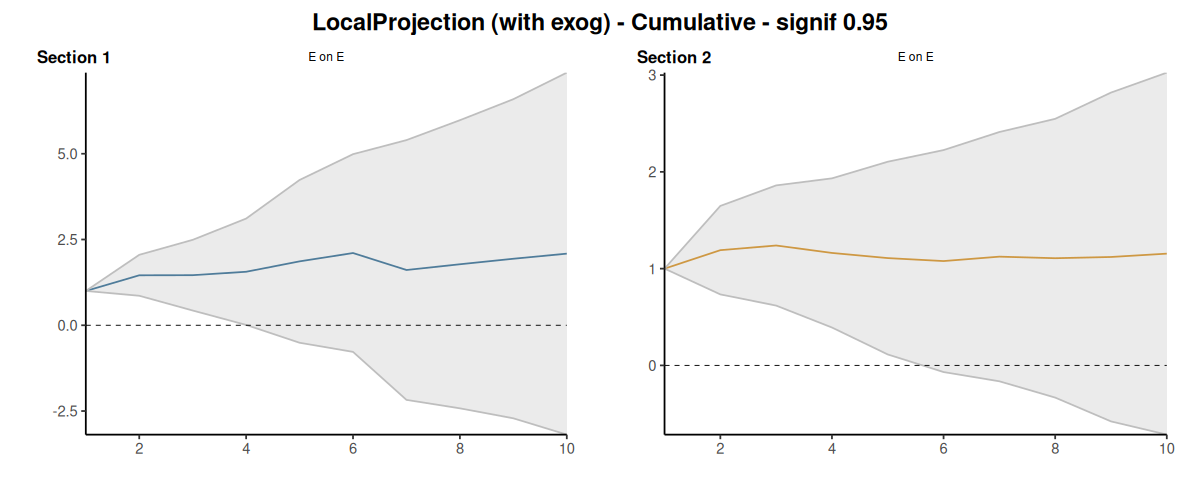

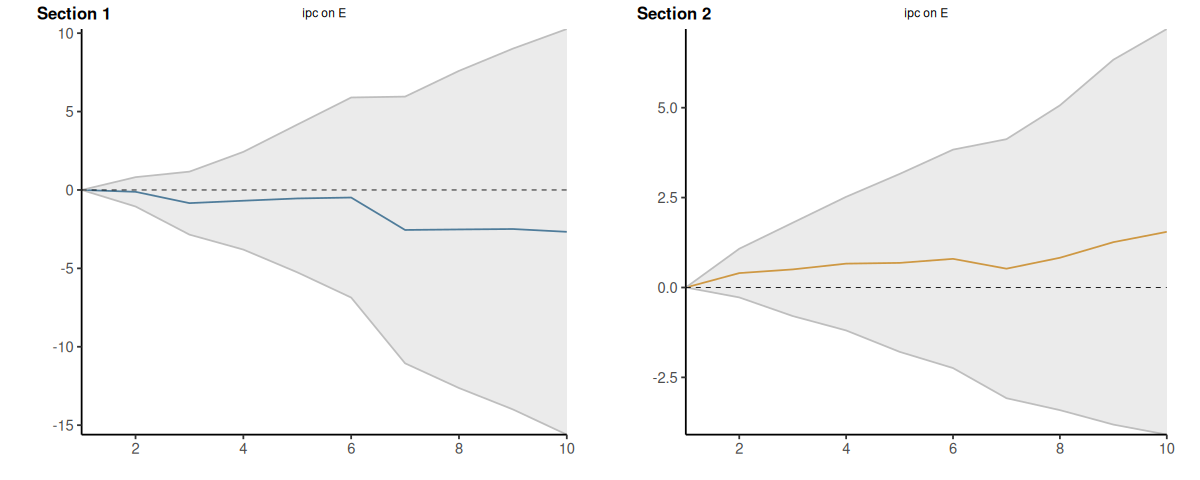

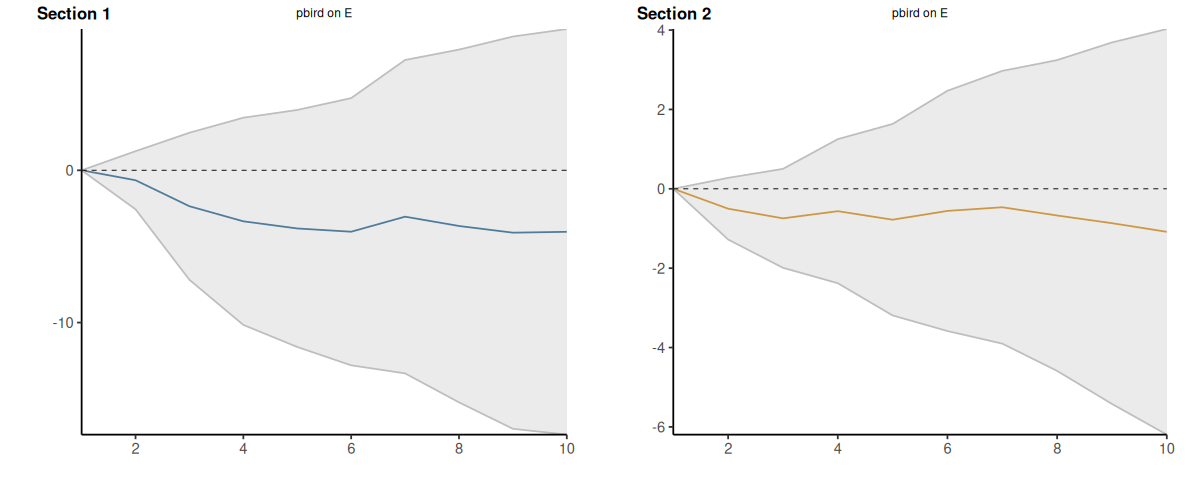

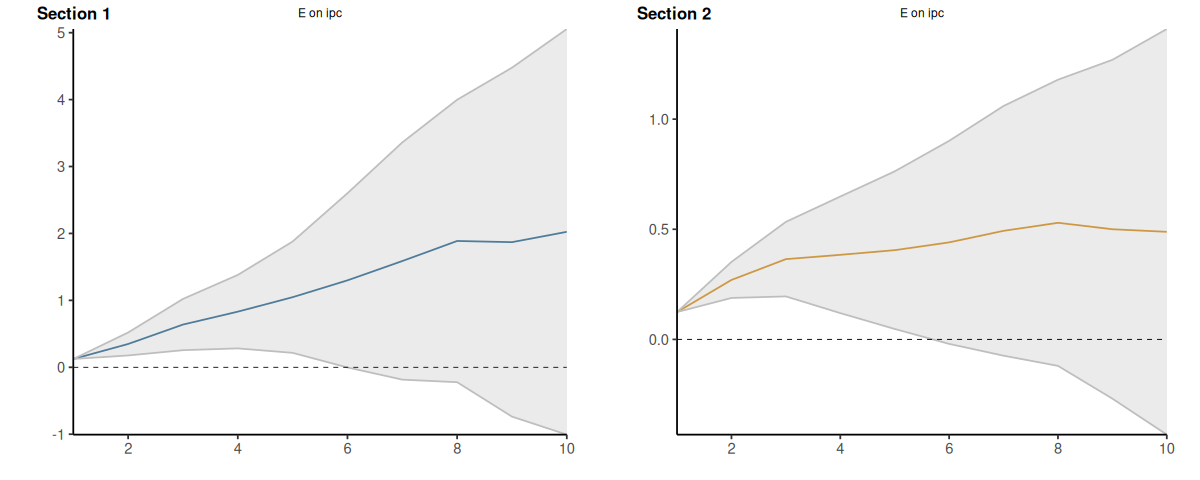

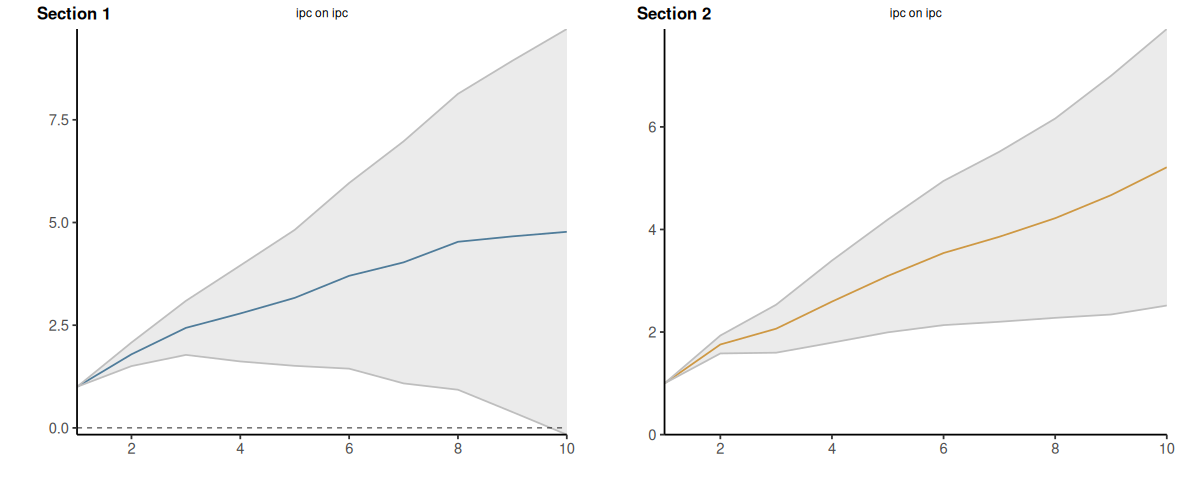

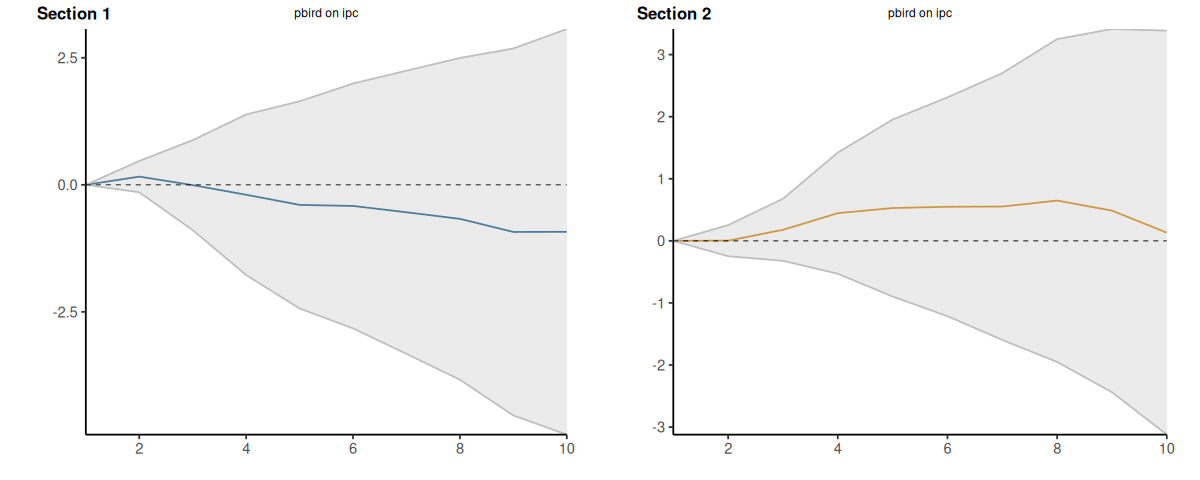

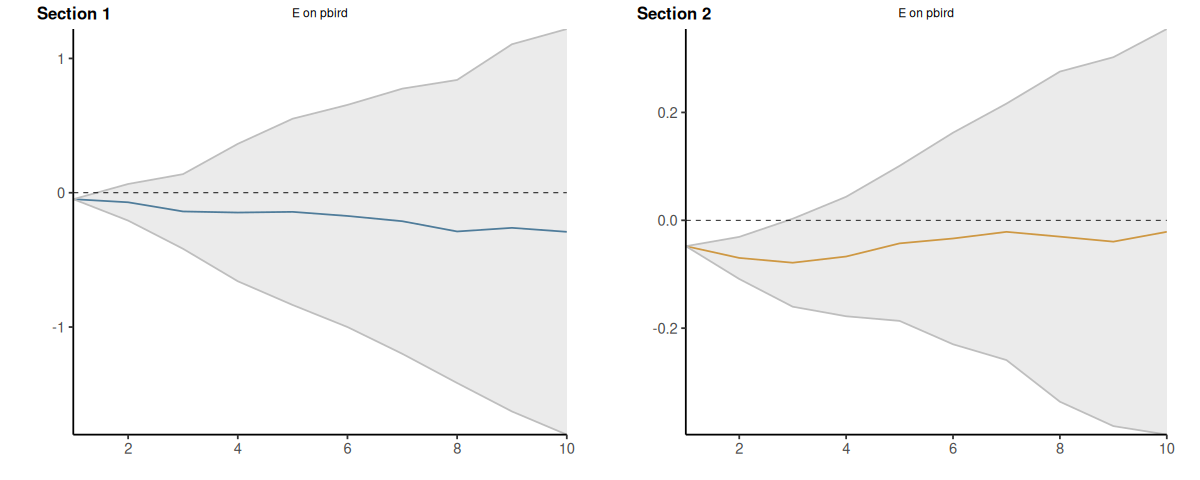

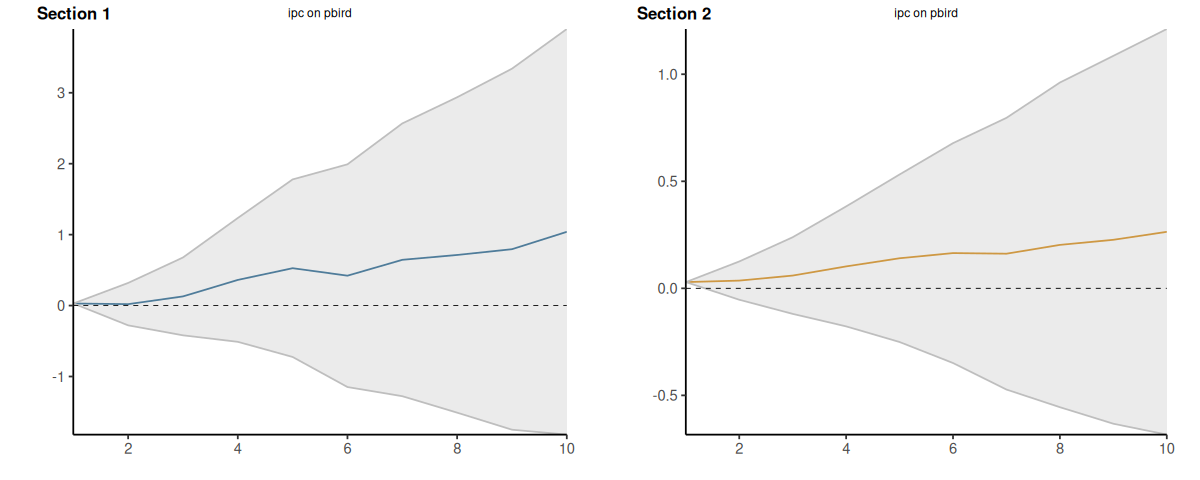

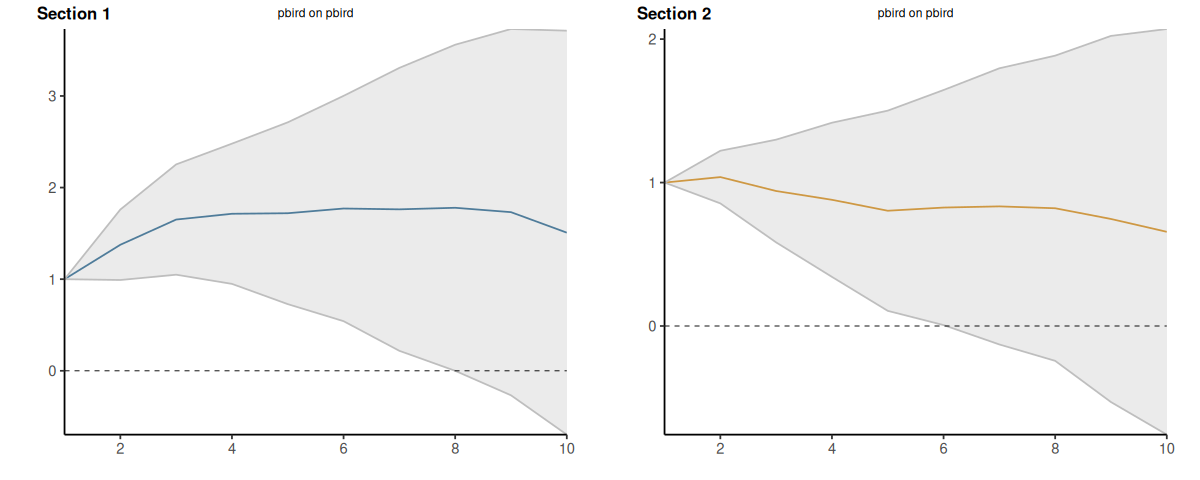

In [ ]:
# Define two new variables based on the specified conditions
df_ERPT_Arg$below_80p_div_4 <- ifelse(df_ERPT_Arg$ipc < (0.2034 / 4), 0, 1)  # Marks 0 if ipc is below 80th percentile threshold
df_ERPT_Arg$above_80p <- ifelse(df_ERPT_Arg$ipc > (0.2034), 1, 0)  # Marks 1 if ipc is above 80th percentile threshold

# Filter the dataframe to exclude rows where below_80p is 1
df_filtered <- df_ERPT_Arg[df_ERPT_Arg$above_80p == 0, ]

# Call run_lp_model with the filtered dataframe and above_80p as the threshold variable
res <- run_lp_model(df_filtered, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = TRUE, threshold_var = 'below_80p_div_4')

In [ ]:
# Add a new column to mark 1 if ipc > 80th percentile or 0 otherwise
df_ERPT_Arg$above_010 <- ifelse(df_ERPT_Arg$ipc > 0.10, 1, 0)

# Print only the rows where above_80th_percentile is 1
display(df_ERPT_Arg[df_ERPT_Arg$above_80th_percentile == 1, ])
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = TRUE, threshold_var = 'above_010')#, threshold_value = 0.047)

Threshold var is binary: will not use logistic decomposition

Run configurations:

lags_endog_lin,lags_criterion,max_lags,lags_exog,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
NA,AIC,6,6,0,1,0.95,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,259,"E, ipc, pbird",3


Lags for Shock: E

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,4,4,3,1,3,1,1,1
ipc,3,3,3,4,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Lags for Shock: ipc

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,4,4,3,1,3,1,1,1
ipc,3,3,3,4,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Lags for Shock: pbird

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,4,4,3,1,3,1,1,1
ipc,3,3,3,4,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Impulse: E -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.4805585,0.48055851,0.4805585,0.4805585,0.4805585,0.4805585
2,2,0.8652203,0.60342923,1.1270114,1.3039116,0.7719060,1.8359172
3,3,1.2259385,0.69663967,1.7552373,1.5098242,0.5553200,2.4643284
4,4,1.5847783,0.74609785,2.4234587,2.3997481,-1.0883466,5.8878428
5,5,1.8834267,0.66140755,3.1054459,2.3905734,NaN,NaN
6,6,2.1304176,0.53337315,3.7274620,2.5603654,NaN,NaN
7,7,2.3880805,0.35243827,4.4237228,2.8383733,NaN,NaN
8,8,2.8149019,0.22605906,5.4037447,3.0073051,NaN,NaN
9,9,3.1731777,0.16090892,6.1854465,3.0927421,NaN,NaN


Impulse: E -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1,-0.03935275,-0.03935275,-0.03935275,-0.03935275,-0.03935275,-0.03935275
13,2,-0.06041753,-0.09633956,-0.02449551,-0.06830789,-0.06460236,-0.07201342
14,3,-0.08545316,-0.15949938,-0.01140693,-0.05558980,-0.11563610,0.00445649
15,4,-0.08965355,-0.20907059,0.02976350,-0.08701783,-0.18691206,0.01287640
16,5,-0.08894225,-0.26083468,0.08295018,-0.08581176,-0.19866940,0.02704588
17,6,-0.08170417,-0.29838459,0.13497625,-0.07203248,-0.19472544,0.05066048
18,7,-0.08232900,-0.34206016,0.17740216,-0.06975686,-0.20696317,0.06744944
19,8,-0.08734144,-0.40729994,0.23261705,-0.07151435,-0.21955046,0.07652176
20,9,-0.08216901,-0.43551573,0.27117770,-0.06064489,-0.22858020,0.10729042


Impulse: ipc -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,1,0.0000000,0.00000000,0.0000000,0.00000,0.000000e+00,0.000000e+00
24,2,0.3618131,-0.18712694,0.9107531,17.72242,1.647217e+01,1.897267e+01
25,3,0.6449827,-0.22848739,1.5184529,20.40066,1.872624e+01,2.207508e+01
26,4,1.3808859,-0.01211449,2.7738862,18.70846,-1.093138e+07,1.093142e+07
27,5,1.9511632,-0.04018495,3.9425114,24.43989,-1.316961e+07,1.316966e+07
28,6,1.9486685,-0.60744029,4.5047773,23.96042,-1.316961e+07,1.316966e+07
29,7,2.4524131,-0.77060927,5.6754355,24.61760,-1.316961e+07,1.316966e+07
30,8,2.9468814,-1.20448376,7.0982465,24.20596,-1.316961e+07,1.316966e+07
31,9,3.3009042,-1.33714782,7.9389562,24.19206,-1.316961e+07,1.316966e+07


Impulse: ipc -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,1,-0.03877977,-0.03877977,-0.03877977,-0.03877977,-0.03877977,-0.03877977
35,2,-0.04578033,-0.07203938,-0.01952128,0.03753949,0.04511849,0.02996048
36,3,-0.05473457,-0.11923633,0.00976718,-0.15805885,-0.22741025,-0.08870745
37,4,-0.05314619,-0.16270413,0.05641175,-0.14396200,-0.23441098,-0.05351302
38,5,-0.04154385,-0.19985496,0.11676726,-0.15925068,-0.25241295,-0.06608840
39,6,-0.04647568,-0.24553183,0.15258046,-0.16865980,-0.26798695,-0.06933264
40,7,-0.07639063,-0.31966673,0.16688548,-0.19032608,-0.29632465,-0.08432751
41,8,-0.09921675,-0.40028016,0.20184665,-0.17251014,-0.28470382,-0.06031647
42,9,-0.12560086,-0.45959908,0.20839737,-0.17504258,-0.29114000,-0.05894516


Impulse: pbird -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,1,0.00000000,0.000000,0.0000000,0.000000,0.000000e+00,0.000000e+00
46,2,-0.58869177,-1.774460,0.5970765,97.579793,9.510339e+01,1.000562e+02
47,3,-0.78027682,-2.975595,1.4150418,83.107769,7.856727e+01,8.764827e+01
48,4,-0.40273917,-3.593673,2.7881948,-3.711056,-6.634479e+07,6.634478e+07
49,5,-0.50397842,-4.385971,3.3780139,-74.293936,-7.943607e+07,7.943593e+07
50,6,0.33221759,-4.748976,5.4134112,-129.772513,-7.943613e+07,7.943587e+07
51,7,-0.03113696,-6.158518,6.0962439,-133.903989,-7.943615e+07,7.943588e+07
52,8,-0.28880728,-7.179187,6.6015725,-160.107263,-7.943618e+07,7.943586e+07
53,9,0.38128381,-7.650454,8.4130217,-161.460058,-7.943618e+07,7.943586e+07


Impulse: pbird -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,0.0000000,0.0000000,0.0000000,0.00000,0.00000,0.00000
57,2,0.2178143,-0.1338081,0.5694367,42.69963,41.71079,43.68847
58,3,0.5551495,-0.2459769,1.3562758,86.22371,83.92007,88.52734
59,4,0.8575890,-0.4604970,2.1756750,28.37027,24.30770,32.43285
60,5,1.2315685,-0.6207930,3.0839301,-31.63051,NaN,NaN
61,6,1.8380000,-0.7489744,4.4249743,-82.42741,NaN,NaN
62,7,2.1066879,-1.2737617,5.4871376,-102.20553,NaN,NaN
63,8,1.9776031,-2.1030061,6.0582123,-162.75804,NaN,NaN
64,9,2.6227844,-2.4572676,7.7028364,-165.13619,NaN,NaN


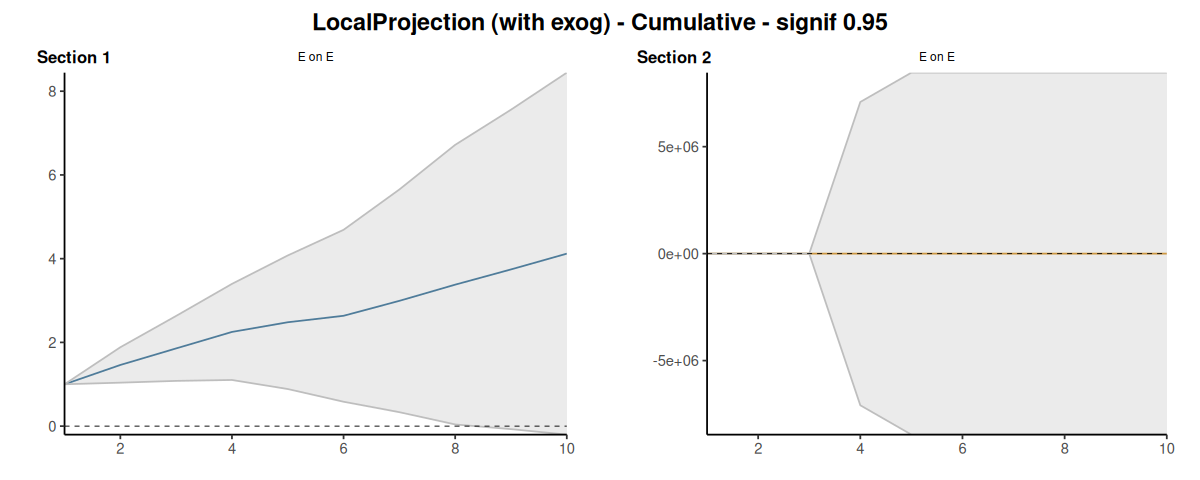

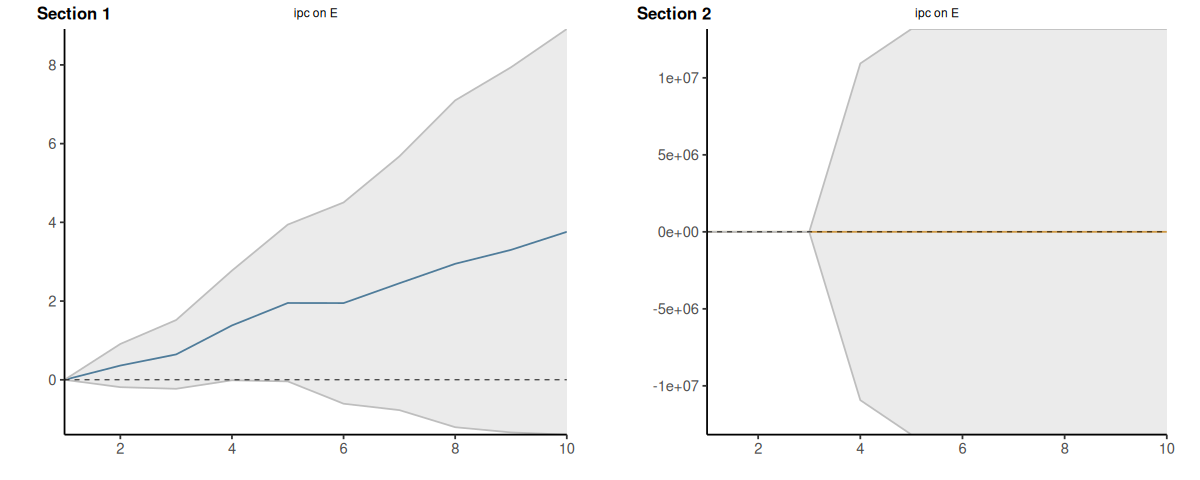

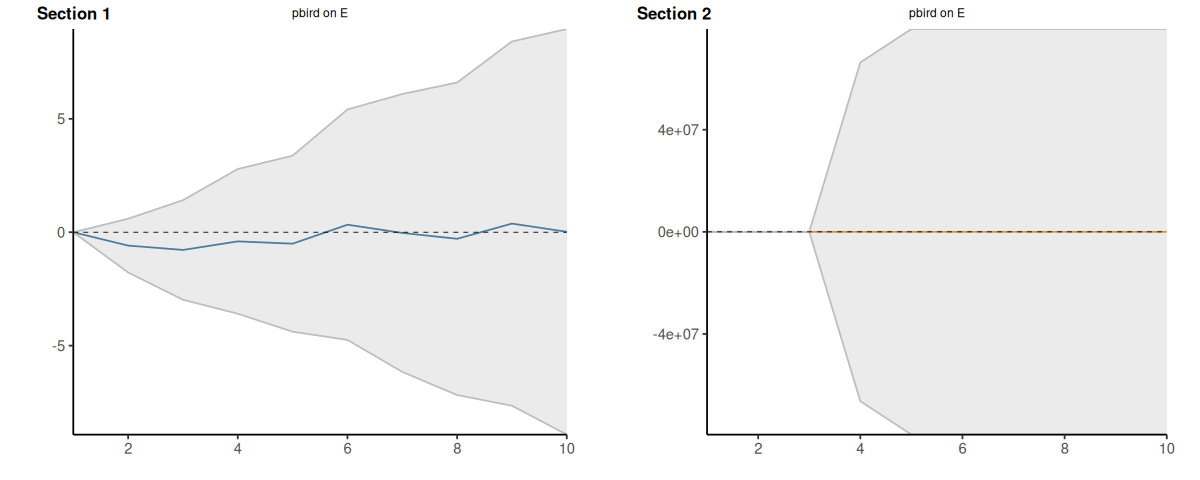

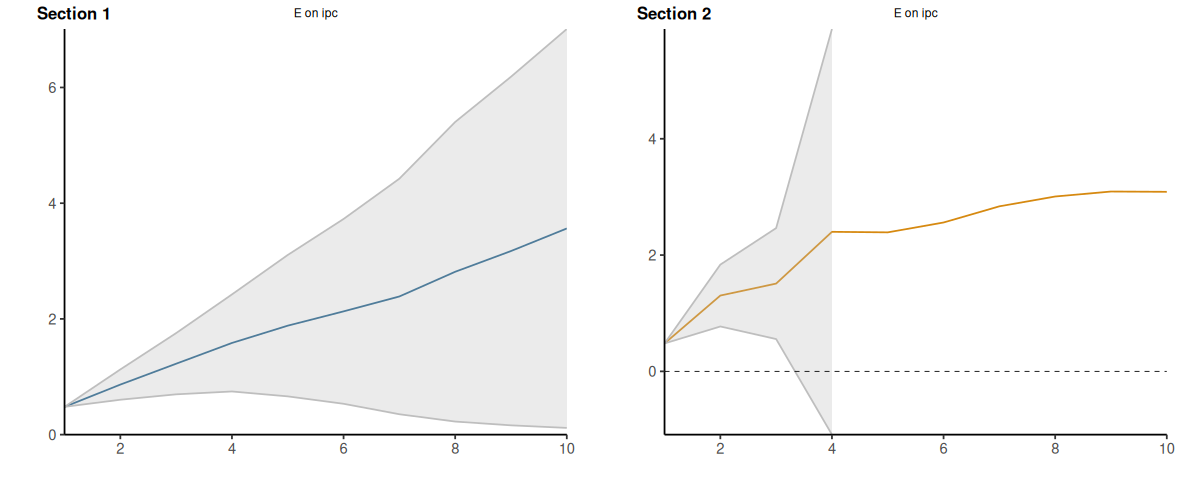

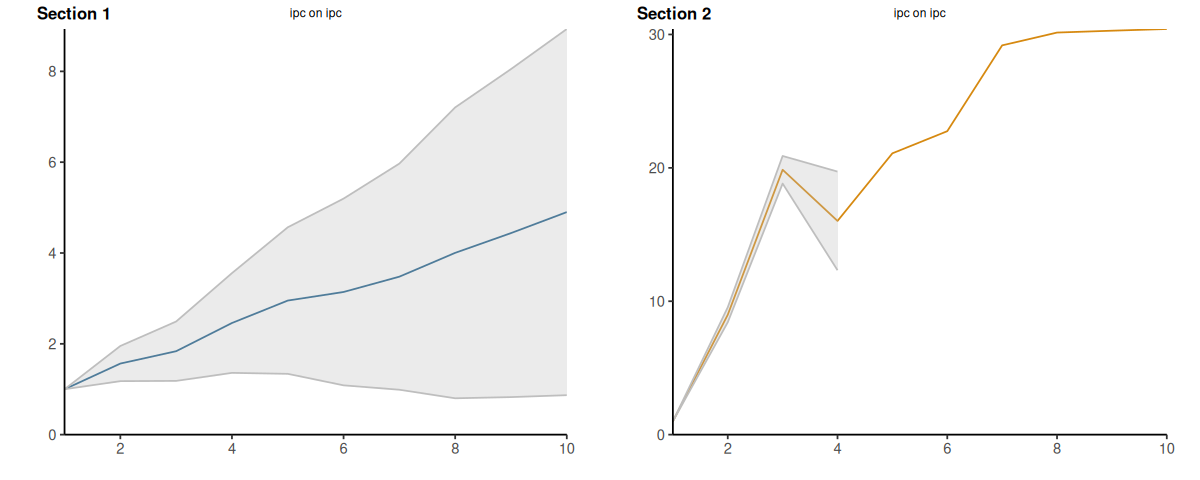

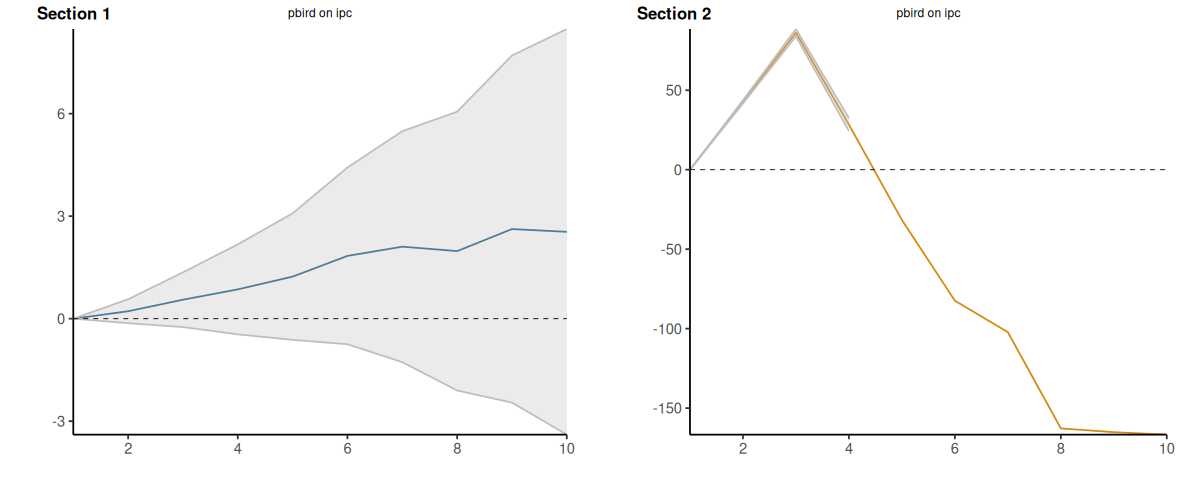

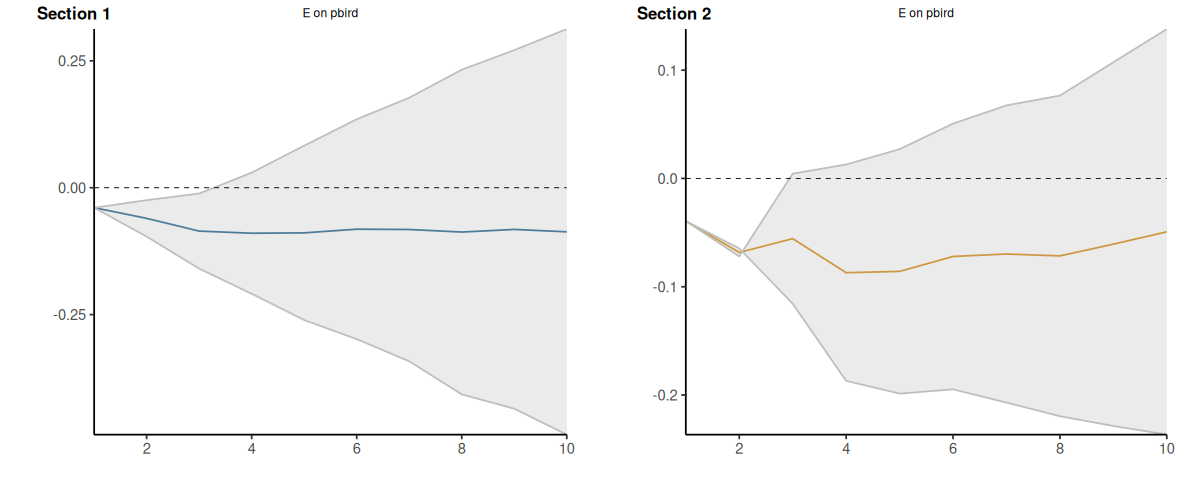

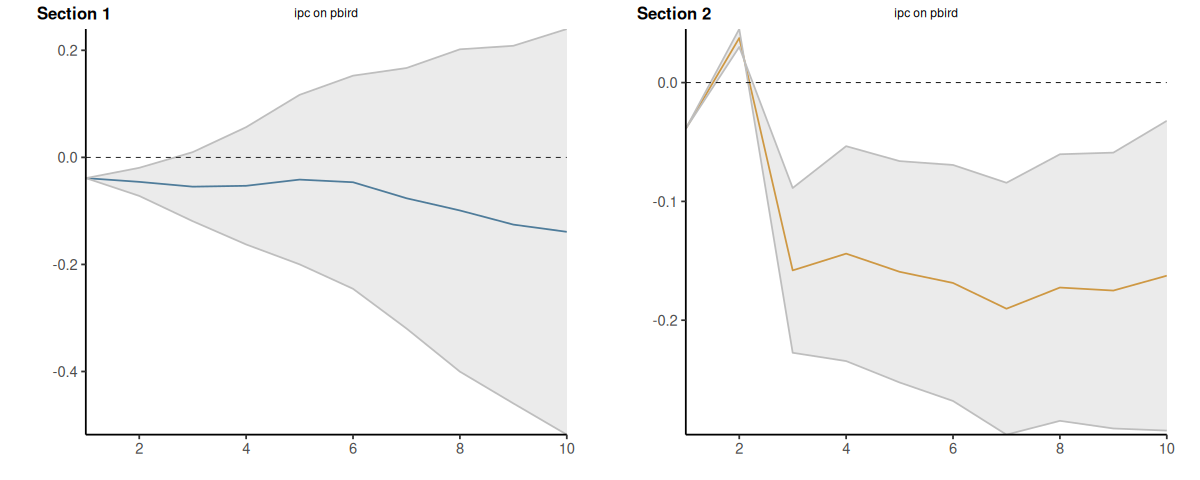

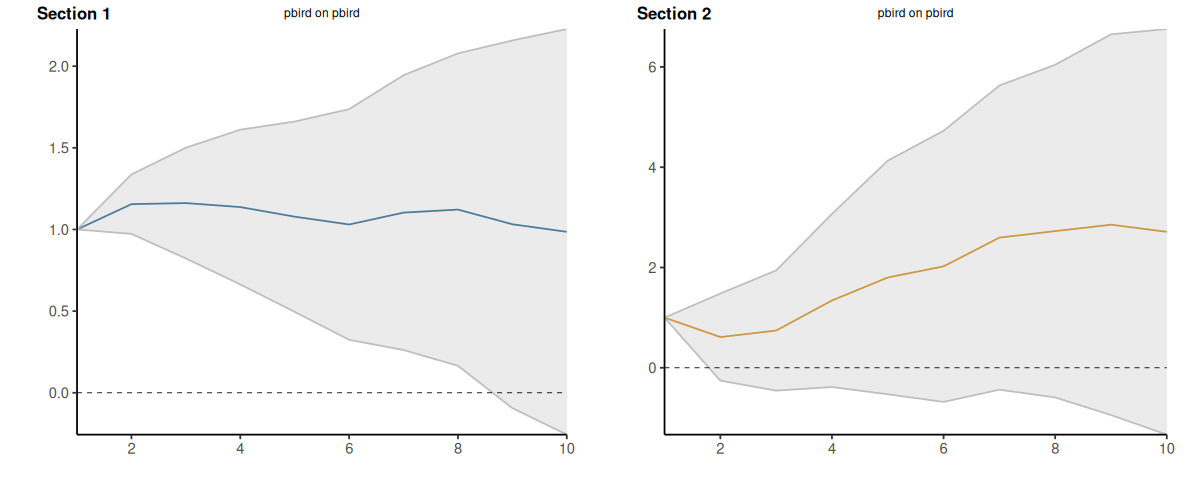

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = TRUE, threshold_var = c("D1"))

Run configurations:

lags_endog_lin,lags_criterion,max_lags,lags_exog,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
4,NaN,NA,NA,0,1,0.68,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,259,"impp_usa, E, ipc, pbird",4


LocalProjection (without exog) - Cumulative - signif 0.68

,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,impp_usa,E,1,-1.5884399,-1.588440,-1.588440
2,impp_usa,E,2,-2.4253698,-3.099881,-1.750859
3,impp_usa,E,3,-2.4199317,-3.783691,-1.056173
4,impp_usa,E,4,-3.3274466,-4.939325,-1.715569
5,impp_usa,E,5,-2.8062242,-5.000504,-0.611944
6,impp_usa,E,6,-1.5626984,-4.312302,1.186905
7,impp_usa,E,7,-1.1003821,-4.298843,2.098079
8,impp_usa,E,8,0.1065919,-3.544804,3.757988
9,impp_usa,E,9,1.7400770,-2.497646,5.977801


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
78,ipc,E,1,0.00000000,0.00000000,0.0000000
79,ipc,E,2,-0.29178191,-0.47679028,-0.1067735
80,ipc,E,3,-0.01971736,-0.34138128,0.3019466
81,ipc,E,4,0.42533642,-0.15295033,1.0036232
82,ipc,E,5,0.83720668,-0.03757299,1.7119863
83,ipc,E,6,0.68294870,-0.39108658,1.7569840
84,ipc,E,7,0.85645787,-0.44432601,2.1572417
85,ipc,E,8,0.91225965,-0.62511731,2.4496366
86,ipc,E,9,0.72036118,-0.95002020,2.3907426


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
111,pbird,E,1,0.0000000,0.000000,0.00000000
112,pbird,E,2,-0.7594019,-1.329511,-0.18929256
113,pbird,E,3,-1.2770469,-2.415691,-0.13840291
114,pbird,E,4,-1.5936000,-3.271410,0.08421018
115,pbird,E,5,-2.4351717,-4.737615,-0.13272833
116,pbird,E,6,-2.1676153,-4.905167,0.56993672
117,pbird,E,7,-2.6854000,-5.980237,0.60943726
118,pbird,E,8,-3.1300704,-6.826179,0.56603840
119,pbird,E,9,-2.5565865,-6.825196,1.71202282


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
34,E,impp_usa,1,0.000000000,0.00000000,0.00000000
35,E,impp_usa,2,-0.002232419,-0.01544312,0.01097828
36,E,impp_usa,3,-0.002094955,-0.03324097,0.02905106
37,E,impp_usa,4,0.002547604,-0.05026336,0.05535857
38,E,impp_usa,5,-0.004778076,-0.09230326,0.08274710
39,E,impp_usa,6,-0.004384612,-0.13222351,0.12345428
40,E,impp_usa,7,-0.003142917,-0.16230162,0.15601579
41,E,impp_usa,8,-0.017507840,-0.20564922,0.17063354
42,E,impp_usa,9,-0.022921001,-0.23763413,0.19179212


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
67,ipc,impp_usa,1,0.00000000,0.00000000,0.00000000
68,ipc,impp_usa,2,0.02308940,0.01006618,0.03611262
69,ipc,impp_usa,3,0.07191827,0.03850169,0.10533486
70,ipc,impp_usa,4,0.10490982,0.05066285,0.15915680
71,ipc,impp_usa,5,0.14314522,0.05745709,0.22883334
72,ipc,impp_usa,6,0.20888990,0.08619599,0.33158380
73,ipc,impp_usa,7,0.23257121,0.08171983,0.38342258
74,ipc,impp_usa,8,0.25309307,0.07631401,0.42987212
75,ipc,impp_usa,9,0.27214317,0.07098138,0.47330496


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
100,pbird,impp_usa,1,0.00000000,0.00000000,0.00000000
101,pbird,impp_usa,2,-0.02387382,-0.08951943,0.04177179
102,pbird,impp_usa,3,-0.03725382,-0.15536900,0.08086135
103,pbird,impp_usa,4,-0.04564630,-0.21466549,0.12337290
104,pbird,impp_usa,5,-0.04398285,-0.29489738,0.20693169
105,pbird,impp_usa,6,0.01928166,-0.29663331,0.33519663
106,pbird,impp_usa,7,0.03879697,-0.32996813,0.40756208
107,pbird,impp_usa,8,0.01331902,-0.41706691,0.44370496
108,pbird,impp_usa,9,-0.12253855,-0.62416338,0.37908628


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
45,E,ipc,1,0.4807211,0.4807211,0.4807211
46,E,ipc,2,0.9763415,0.6762197,1.2764634
47,E,ipc,3,1.2173273,0.6821138,1.7525408
48,E,ipc,4,1.6379031,0.8841186,2.3916876
49,E,ipc,5,1.9297528,0.9089188,2.9505868
50,E,ipc,6,2.1397259,0.9636092,3.3158425
51,E,ipc,7,2.2981804,0.9398200,3.6565409
52,E,ipc,8,2.5313746,0.9979577,4.0647915
53,E,ipc,9,2.6673257,0.9879513,4.3467001


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
12,impp_usa,ipc,1,-0.54521891,-0.54521891,-0.5452189
13,impp_usa,ipc,2,-0.83490092,-0.91987363,-0.7499282
14,impp_usa,ipc,3,-0.39791290,-0.98262751,0.1868017
15,impp_usa,ipc,4,-0.92937700,-1.65616382,-0.2025902
16,impp_usa,ipc,5,-0.58968526,-1.57045740,0.3910869
17,impp_usa,ipc,6,0.07343146,-1.31551031,1.4623732
18,impp_usa,ipc,7,0.41246847,-1.24439982,2.0693368
19,impp_usa,ipc,8,1.11408588,-0.79422254,3.0223943
20,impp_usa,ipc,9,2.42008979,0.09421413,4.7459654


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
122,pbird,ipc,1,0.00000000,0.00000000,0.0000000
123,pbird,ipc,2,0.12901031,-0.06618756,0.3242082
124,pbird,ipc,3,0.23773003,-0.27385070,0.7493108
125,pbird,ipc,4,0.23263560,-0.69827478,1.1635460
126,pbird,ipc,5,0.02748855,-1.30023951,1.3552166
127,pbird,ipc,6,0.04382379,-1.65450665,1.7421542
128,pbird,ipc,7,-0.16160297,-2.24722510,1.9240192
129,pbird,ipc,8,-0.64644383,-3.18024364,1.8873560
130,pbird,ipc,9,-0.13041419,-3.17705503,2.9162266


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
56,E,pbird,1,-0.03465381,-0.03465381,-0.034653806
57,E,pbird,2,-0.05565528,-0.07888807,-0.032422483
58,E,pbird,3,-0.06134776,-0.10432232,-0.018373210
59,E,pbird,4,-0.08341803,-0.15012441,-0.016711662
60,E,pbird,5,-0.08844089,-0.17421299,-0.002668797
61,E,pbird,6,-0.07411765,-0.17594739,0.027712095
62,E,pbird,7,-0.07346928,-0.19048527,0.043546708
63,E,pbird,8,-0.08078981,-0.21753487,0.055955246
64,E,pbird,9,-0.06869064,-0.21980994,0.082428652


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
23,impp_usa,pbird,1,0.30567183,0.30567183,0.3056718
24,impp_usa,pbird,2,0.38362959,0.32224885,0.4450103
25,impp_usa,pbird,3,0.48295137,0.34900383,0.6168989
26,impp_usa,pbird,4,0.56865605,0.36047097,0.7768411
27,impp_usa,pbird,5,0.46980116,0.20270863,0.7368937
28,impp_usa,pbird,6,0.36389593,0.05247054,0.6753213
29,impp_usa,pbird,7,0.29935503,-0.09526961,0.6939797
30,impp_usa,pbird,8,0.31203804,-0.12186164,0.7459377
31,impp_usa,pbird,9,0.12648073,-0.39053835,0.6434998


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
89,ipc,pbird,1,-0.03825094,-0.03825094,-0.0382509360
90,ipc,pbird,2,-0.01297025,-0.03376649,0.0078259848
91,ipc,pbird,3,-0.03129879,-0.06341179,0.0008142158
92,ipc,pbird,4,-0.04340312,-0.09708829,0.0102820550
93,ipc,pbird,5,-0.05529387,-0.12687438,0.0162866411
94,ipc,pbird,6,-0.05413601,-0.13911042,0.0308384005
95,ipc,pbird,7,-0.07402955,-0.17461532,0.0265562283
96,ipc,pbird,8,-0.09236039,-0.21093687,0.0262160885
97,ipc,pbird,9,-0.09619137,-0.22812830,0.0357455572


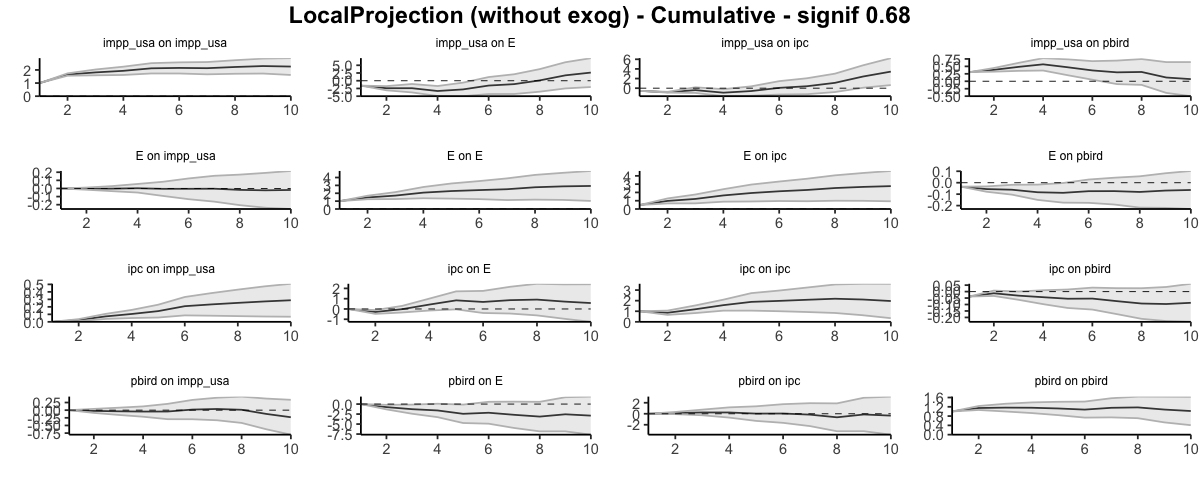

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), horizons=10, signif = 0.68, cumulative=TRUE, trend=0, fixed_lags=4)